In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels 
import warnings
warnings.filterwarnings('ignore')

### Read the data as an appropriate Time Series data and plot the data.

In [2]:
df=pd.read_csv("C:/Users/2261092/Downloads/Sparkling.csv")

In [3]:
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [4]:
df.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [5]:
df=pd.read_csv("C:/Users/2261092/Downloads/Sparkling.csv", parse_dates=["YearMonth"])

In [6]:
df

,YearMonth,Sparkling
0,1980-01-01,1686
1,1980-02-01,1591
2,1980-03-01,2304
3,1980-04-01,1712
4,1980-05-01,1471
...,...,...
182,1995-03-01,1897
183,1995-04-01,1862
184,1995-05-01,1670
185,1995-06-01,1688


In [7]:
df.set_index(keys="YearMonth", inplace=True)

In [8]:
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

<AxesSubplot:xlabel='YearMonth'>

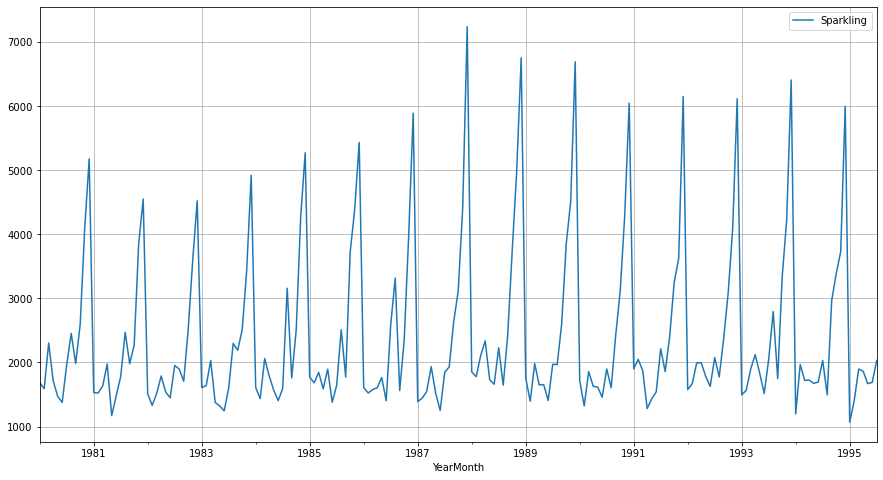

In [10]:
df.plot(grid=True)

### Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [11]:
df.isna().sum()

Sparkling    0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sparkling,187.0,2402.417112,1295.11154,1070.0,1605.0,1874.0,2549.0,7242.0


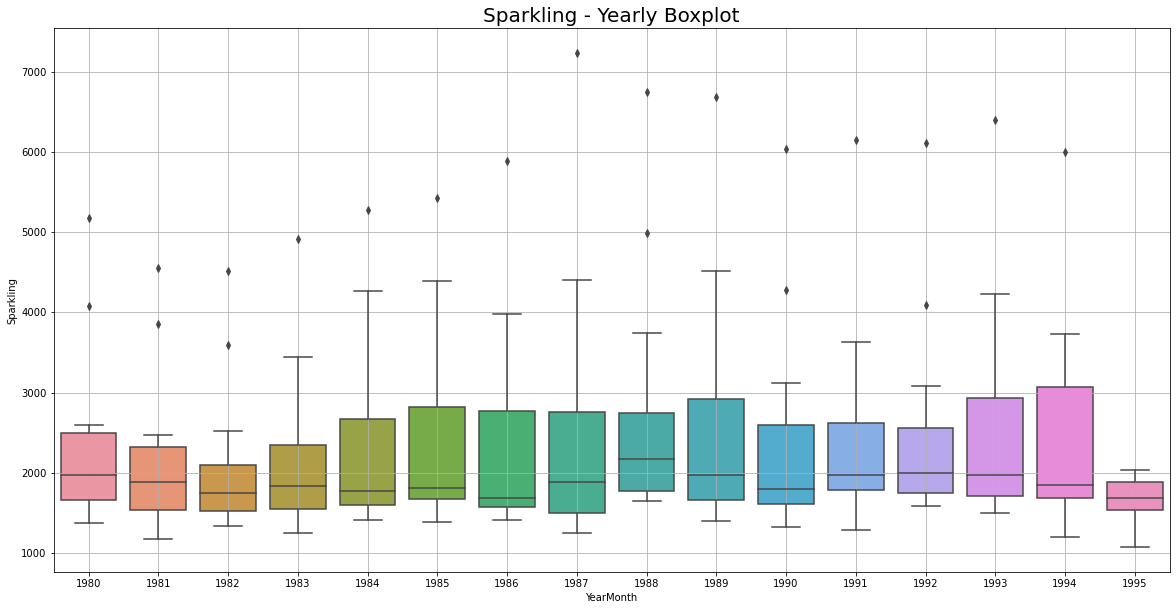

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.index.year, y=df["Sparkling"])
plt.title("Sparkling - Yearly Boxplot", fontsize=20)
plt.grid()
plt.show()

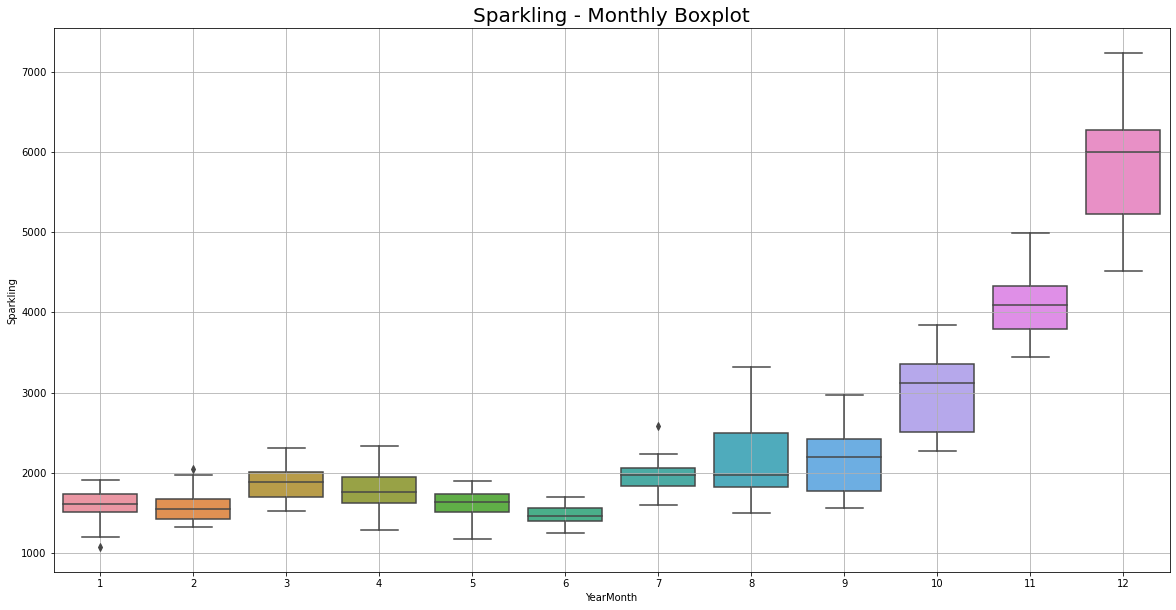

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.index.month, y=df["Sparkling"])
plt.title("Sparkling - Monthly Boxplot", fontsize=20)
plt.grid()
plt.show()

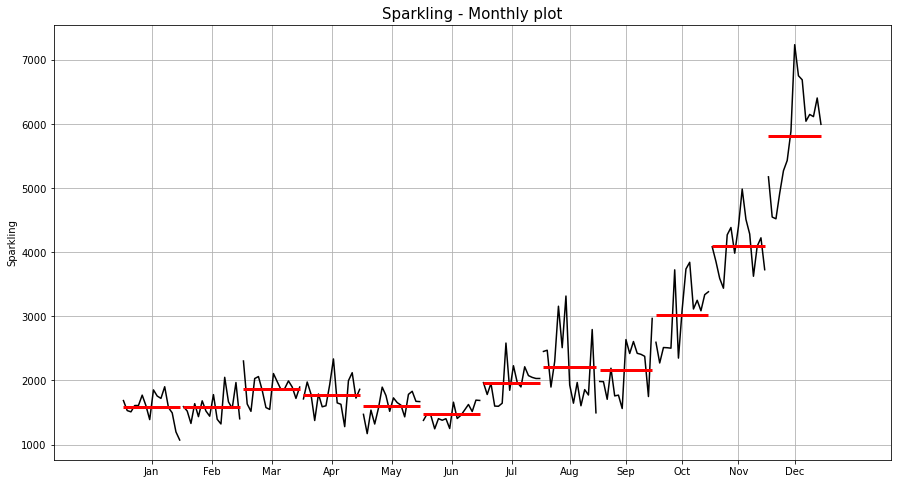

In [15]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df, ylabel = "Sparkling")
plt.title("Sparkling - Monthly plot", fontsize = 15)
plt.grid();

In [16]:
yearly_sales_across_months = pd.pivot_table(df, values = "Sparkling", columns = df.index.month, index = df.index.year)
yearly_sales_across_months

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


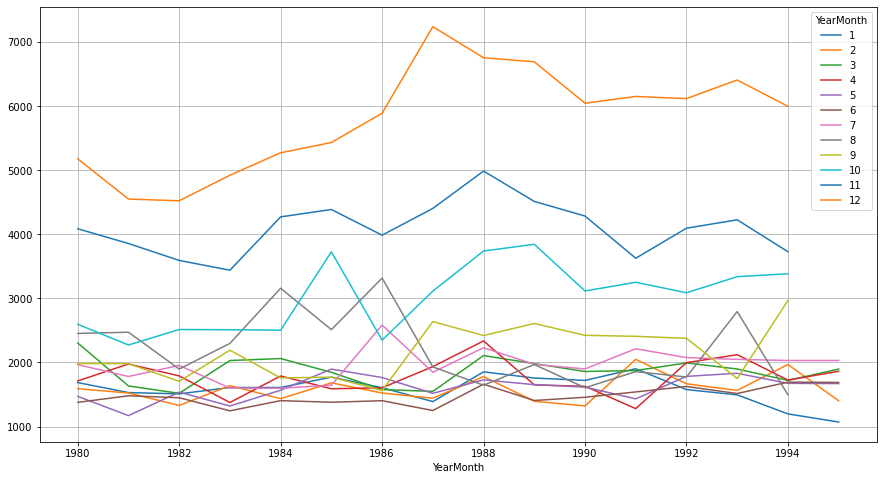

In [17]:
yearly_sales_across_months.plot()
plt.grid()

In [18]:
df_yearly_sum=df.resample("A").sum()
df_yearly_sum

,Sparkling
YearMonth,
1980-12-31,28406
1981-12-31,26227
1982-12-31,25321
1983-12-31,26180
1984-12-31,28431
1985-12-31,29640
1986-12-31,29170
1987-12-31,30258
1988-12-31,33246


Text(0.5, 0, 'Sum of the observation of each year')

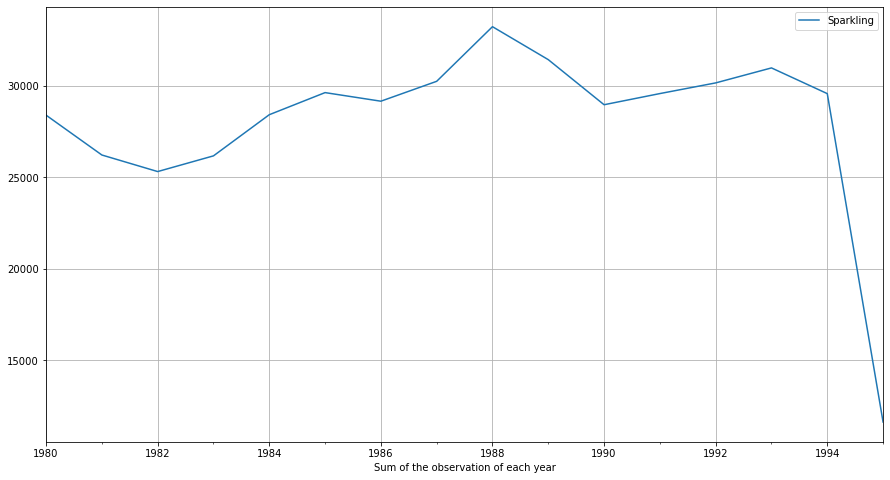

In [19]:
df_yearly_sum.plot()
plt.grid()
plt.xlabel("Sum of the observation of each year")

In [20]:
df_yearly_mean = df.resample("Y").mean()
df_yearly_mean

,Sparkling
YearMonth,
1980-12-31,2367.166667
1981-12-31,2185.583333
1982-12-31,2110.083333
1983-12-31,2181.666667
1984-12-31,2369.250000
1985-12-31,2470.000000
1986-12-31,2430.833333
1987-12-31,2521.500000
1988-12-31,2770.500000


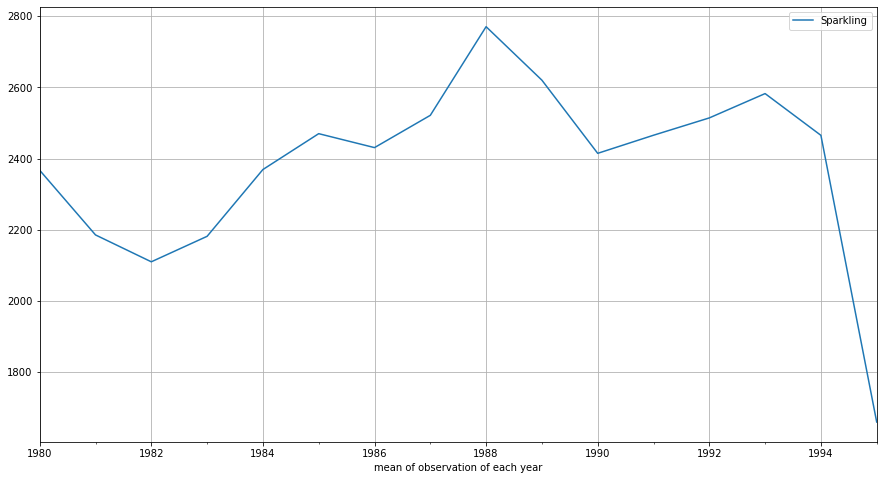

In [21]:
df_yearly_mean.plot()
plt.xlabel("mean of observation of each year")
plt.grid()

In [22]:
df_quarterly_sum=df.resample("Q").sum()
df_yearly_sum.head()

,Sparkling
YearMonth,
1980-12-31,28406
1981-12-31,26227
1982-12-31,25321
1983-12-31,26180
1984-12-31,28431


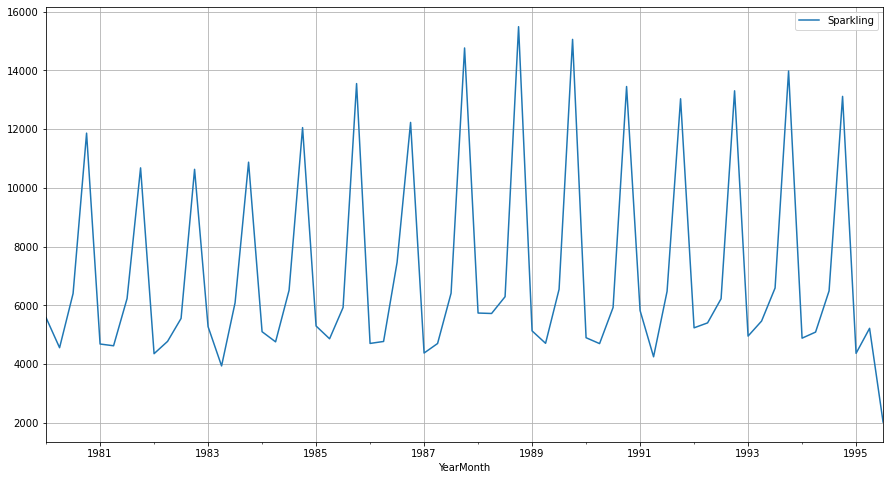

In [23]:
df_quarterly_sum.plot()
plt.grid()

In [24]:
df_quarterly_mean=df.resample("Q").sum()
df_yearly_mean.head()

,Sparkling
YearMonth,
1980-12-31,2367.166667
1981-12-31,2185.583333
1982-12-31,2110.083333
1983-12-31,2181.666667
1984-12-31,2369.250000


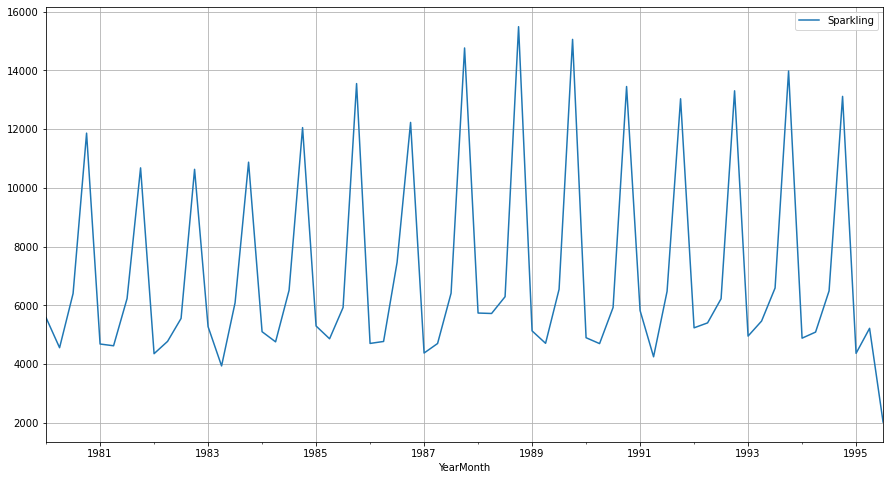

In [25]:
df_quarterly_mean.plot()
plt.grid()

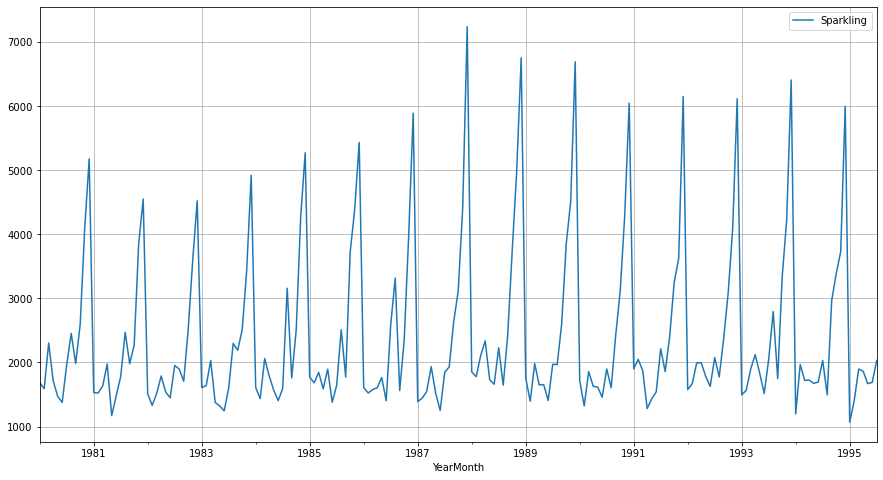

In [26]:
df.plot()
plt.grid()

In [27]:
df_decade_sum = df.resample("10Y").sum()
df_decade_sum

,Sparkling
YearMonth,
1980-12-31,28406
1990-12-31,288893
2000-12-31,131953


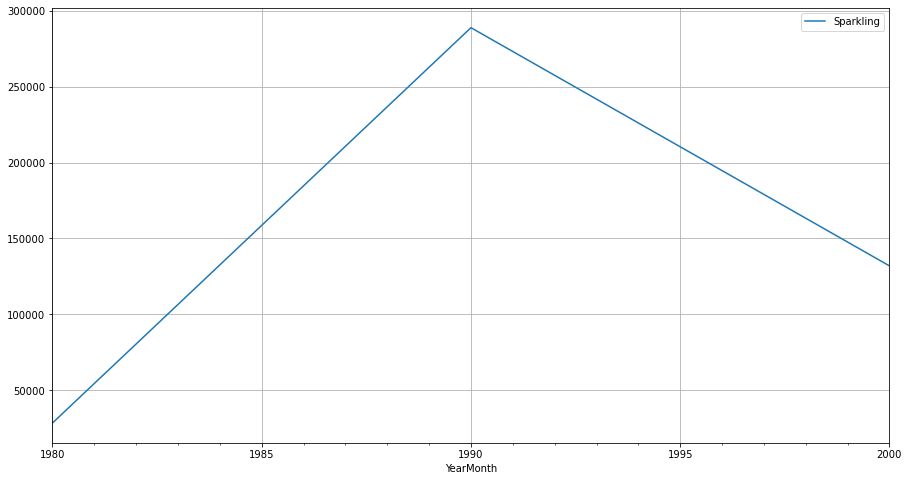

In [28]:
df_decade_sum.plot()
plt.grid()

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
df_add_decompose = seasonal_decompose(df, model = "additive", period = 12)

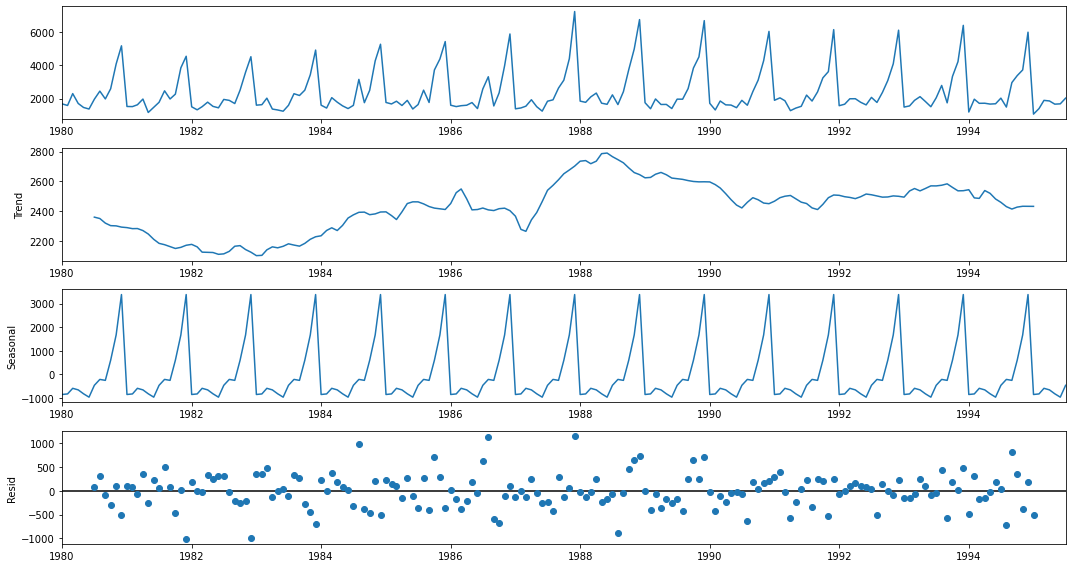

In [31]:
df_add_decompose.plot()
plt.show()

In [32]:
trend=df_add_decompose.trend
seasonality=df_add_decompose.seasonal
residual=df_add_decompose.resid

In [33]:
print("Trend","/n",trend.head(),"/n")
print("Seasonality","/n",seasonality.head(),"/n")
print("Residual","/n",residual.head(),"/n")

Trend /n YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: trend, dtype: float64 /n
Seasonality /n YearMonth
1980-01-01   -854.260599
1980-02-01   -830.350678
1980-03-01   -592.356630
1980-04-01   -658.490559
1980-05-01   -824.416154
Name: seasonal, dtype: float64 /n
Residual /n YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: resid, dtype: float64 /n


In [34]:
deseasonality_ts=trend+residual
deseasonality_ts.head(10)

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2431.502265
1980-08-01    2667.332821
1980-09-01    2238.677265
1980-10-01    1996.230043
dtype: float64

In [35]:
deseasonality_ts.tail(10)

YearMonth
1994-10-01    2785.230043
1994-11-01    2053.932821
1994-12-01    2612.016154
1995-01-01    1924.260599
1995-02-01            NaN
1995-03-01            NaN
1995-04-01            NaN
1995-05-01            NaN
1995-06-01            NaN
1995-07-01            NaN
dtype: float64

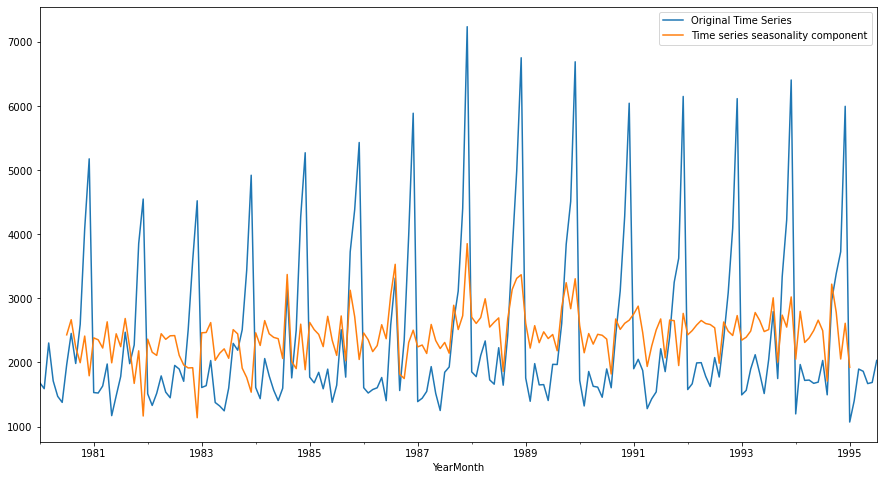

In [36]:
df.plot()
deseasonality_ts.plot()
plt.legend(["Original Time Series","Time series seasonality component"])

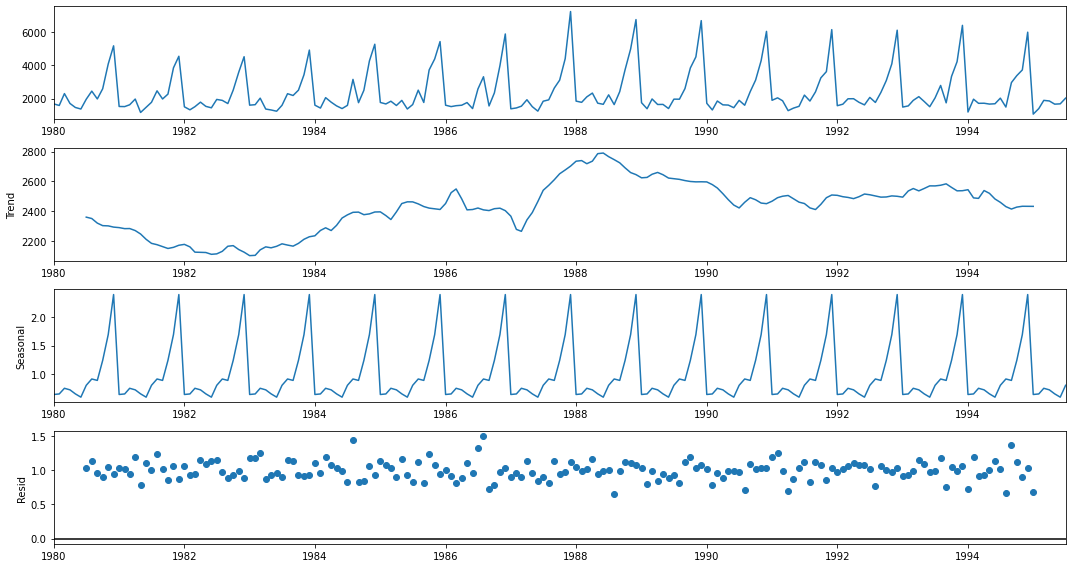

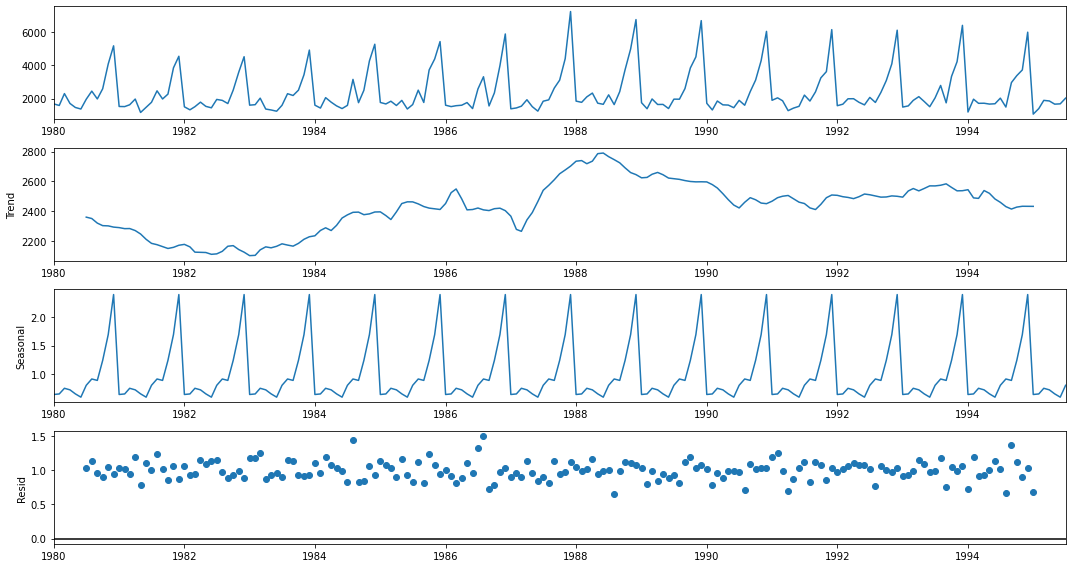

In [37]:
df_mul_decompose=seasonal_decompose(df,model="multiplicative")
df_mul_decompose.plot()

In [38]:
trend=df_mul_decompose.trend
seasonality=df_mul_decompose.seasonal
residual=df_mul_decompose.resid

In [39]:
print("Trend","/n",trend.head(),"/n")
print("Seasonality","/n",seasonality.head(),"/n")
print("Residual","/n",residual.head(),"/n")

Trend /n YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: trend, dtype: float64 /n
Seasonality /n YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
Name: seasonal, dtype: float64 /n
Residual /n YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: resid, dtype: float64 /n


In [40]:
deseasonality_ts_mul=trend+residual
deseasonality_ts_mul.head(10)

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2361.695896
1980-08-01    2352.468741
1980-09-01    2321.497620
1980-10-01    2304.490847
dtype: float64

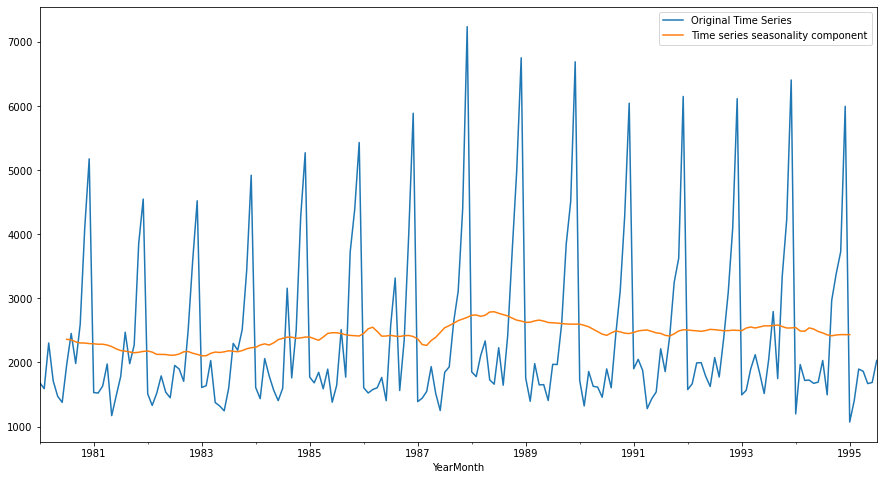

In [41]:
df.plot()
deseasonality_ts_mul.plot()
plt.legend(["Original Time Series","Time series seasonality component"])

### Split the data into training and test. The test data should start in 1991.

In [42]:
train=df[df.index<"1991"]
test=df[df.index>="1991"]

In [43]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


<AxesSubplot:xlabel='YearMonth'>

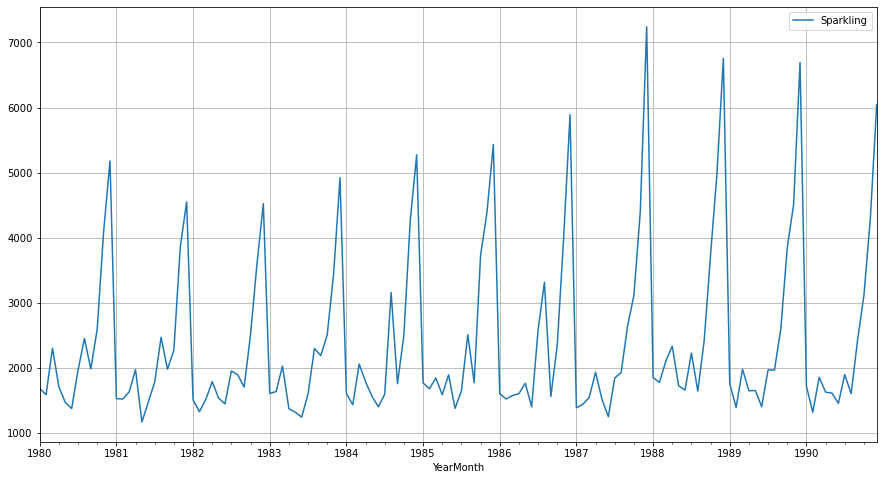

In [44]:
train.plot(grid=True)

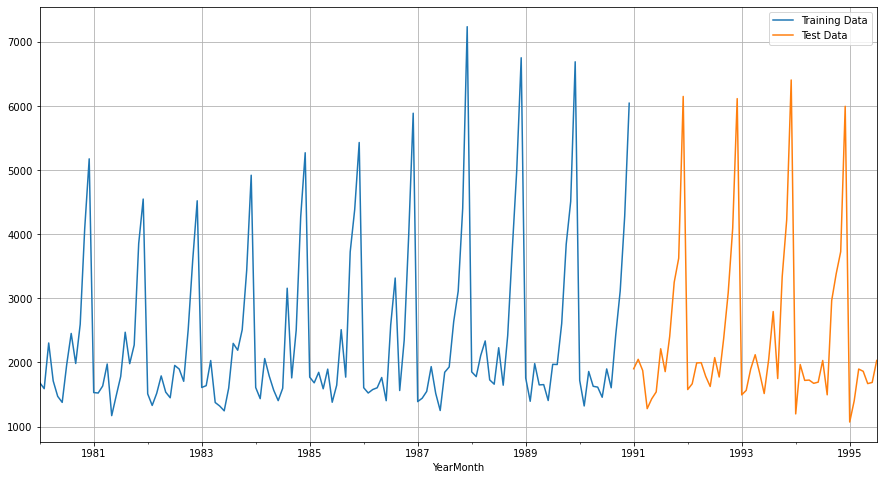

In [45]:
train["Sparkling"].plot()
test["Sparkling"].plot()
plt.grid()
plt.legend(["Training Data","Test Data"])
plt.show()

### Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

##### Model1: Linear regression

In [46]:
# For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence.
# For this we need to modify our training data before fitting it into a linear regression.

train_time=[i+1 for i in range(len(train))]
test_time=[i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [47]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [48]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5


Last few rows of Training Data


,Sparkling,time
YearMonth,,
1990-08-01,1605,128
1990-09-01,2424,129
1990-10-01,3116,130
1990-11-01,4286,131
1990-12-01,6047,132


First few rows of Test Data


,Sparkling,time
YearMonth,,
1991-01-01,1902,133
1991-02-01,2049,134
1991-03-01,1874,135
1991-04-01,1279,136
1991-05-01,1432,137


Last few rows of Test Data


,Sparkling,time
YearMonth,,
1995-03-01,1897,183
1995-04-01,1862,184
1995-05-01,1670,185
1995-06-01,1688,186
1995-07-01,2031,187


In [49]:
#Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛⎯to build the model on the training data and test the model on the test data.

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

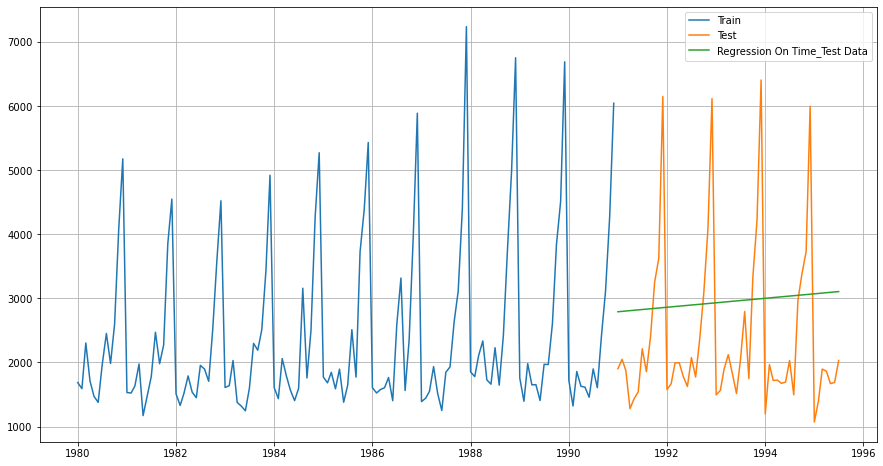

In [53]:
train_predictions_model1  = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [54]:
from sklearn import metrics

In [55]:
#model evalution
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [56]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175


##### Model 2: Naive Approach:  𝑦̂ 𝑡+1=

In [57]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [58]:
train.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [59]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

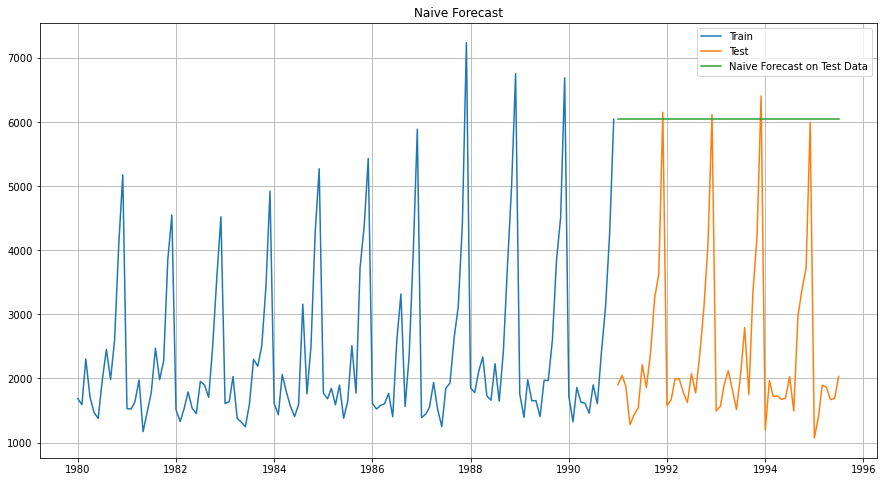

In [60]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [61]:
# Model evaluation
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [62]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


##### Model3: Simple Average

In [63]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [64]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


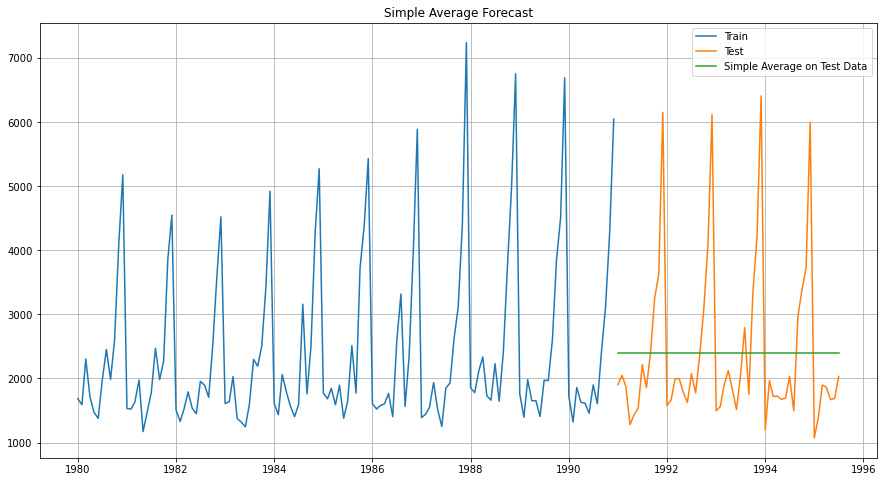

In [65]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [66]:
# Model evaluation 
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [67]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


##### Model4: Moving average

In [68]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [69]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


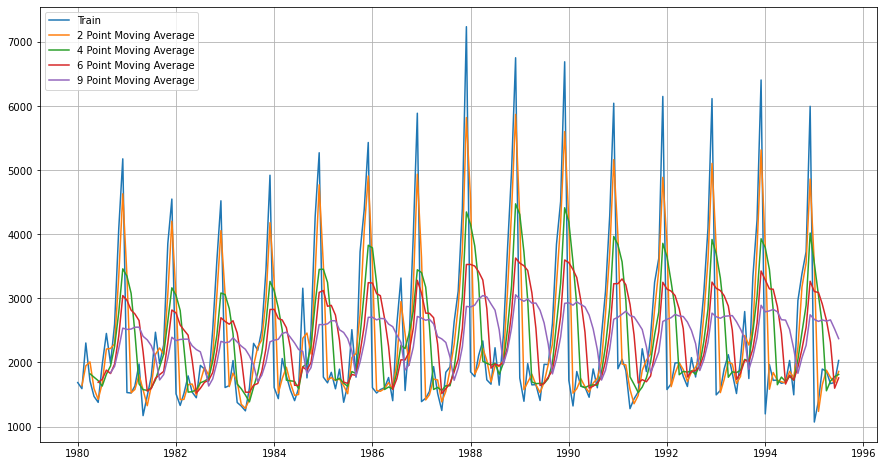

In [70]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [71]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year<1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year>=1991]

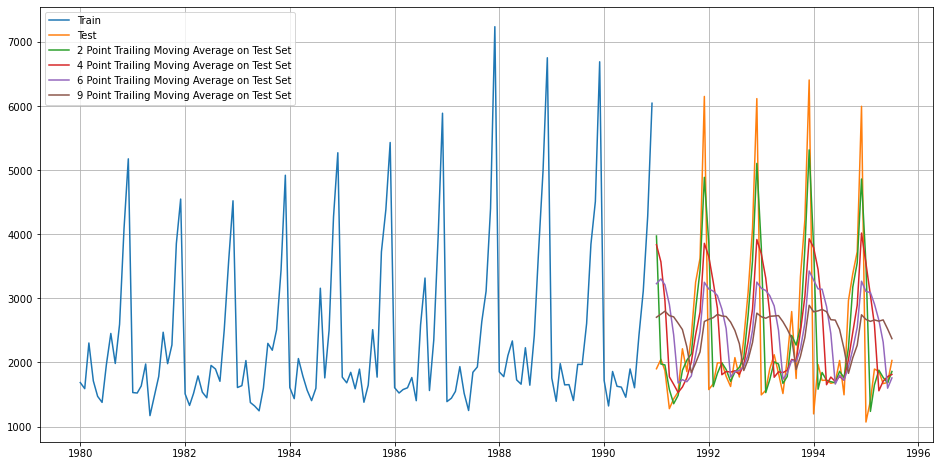

In [72]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [73]:
# model evaluation

In [74]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [75]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


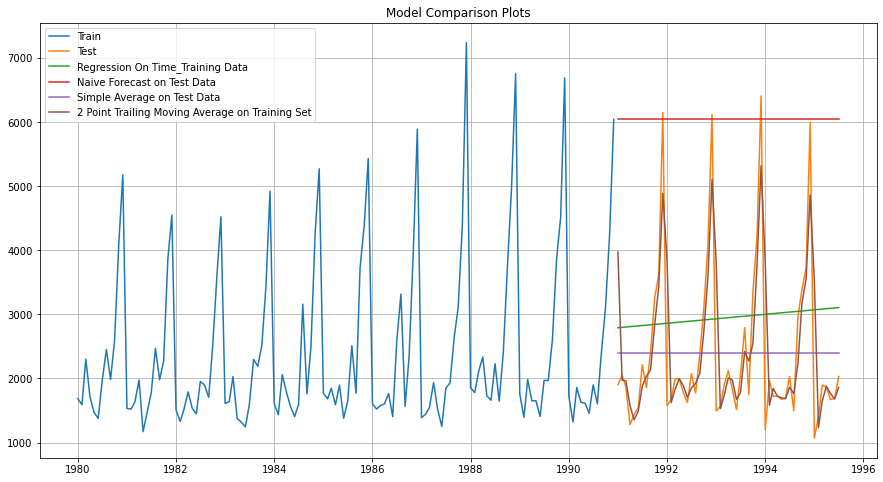

In [76]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [77]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [78]:
model_SES = SimpleExpSmoothing(train, initialization_method='estimated')

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [79]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [80]:
model_SES_autofit.params

{'smoothing_level': 0.07028442075641193,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.8402828521703,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    2804.650301
1991-02-01    2804.650301
1991-03-01    2804.650301
1991-04-01    2804.650301
1991-05-01    2804.650301
1991-06-01    2804.650301
1991-07-01    2804.650301
1991-08-01    2804.650301
1991-09-01    2804.650301
1991-10-01    2804.650301
1991-11-01    2804.650301
1991-12-01    2804.650301
1992-01-01    2804.650301
1992-02-01    2804.650301
1992-03-01    2804.650301
1992-04-01    2804.650301
1992-05-01    2804.650301
1992-06-01    2804.650301
1992-07-01    2804.650301
1992-08-01    2804.650301
1992-09-01    2804.650301
1992-10-01    2804.650301
1992-11-01    2804.650301
1992-12-01    2804.650301
1993-01-01    2804.650301
1993-02-01    2804.650301
1993-03-01    2804.650301
1993-04-01    2804.650301
1993-05-01    2804.650301
1993-06-01    2804.650301
1993-07-01    2804.650301
1993-08-01    2804.650301
1993-09-01    2804.650301
1993-10-01    2804.650301
1993-11-01    2804.650301
1993-12-01    2804.650301
1994-01-01    2804.650301
1994-02-01    2804.650301
1994-03-01  

Text(0.5, 1.0, 'Alpha - 0.07 Prediction')

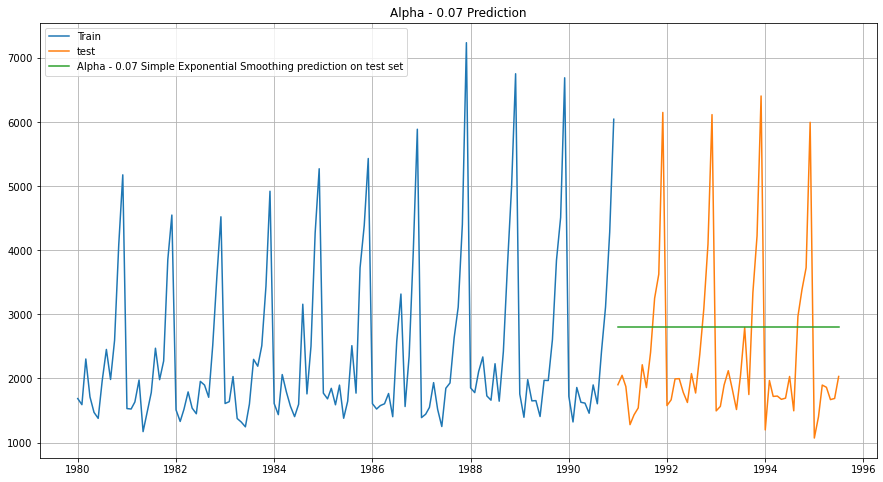

In [82]:
plt.plot(train, label="Train")
plt.plot(test, label="test")
plt.plot(SES_predict, label="Alpha - 0.07 Simple Exponential Smoothing prediction on test set")

plt.legend(loc='best')
plt.grid()
plt.title("Alpha - 0.07 Prediction")

In [83]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [84]:
from sklearn.metrics import mean_squared_error
import statsmodels.tools.eval_measures as em

In [85]:
print("SES RMSE: ", mean_squared_error(test.values, SES_predict.values, squared=False))
print("SES RMSE (calculated using statsmodel): ",em.rmse(test.values,SES_predict.values[0]))

SES RMSE:  1338.0008612252468
SES RMSE (calculated using statsmodel):  [1338.00086123]


In [86]:
result_1=pd.DataFrame({"RMSE": [em.rmse(test.values, SES_predict.values)[0]]}, index=["Alpha=0.07,SESres"])

In [87]:
result_1

,RMSE
"Alpha=0.07,SESres",1338.000861


In [88]:
model_des=Holt(train, initialization_method="estimated")
model_des=model_des.fit()

print(" ")
print("Holt model exponential smoothing estimated parameters")
print(" ")
print(model_des.params)

 
Holt model exponential smoothing estimated parameters
 
{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [89]:
des_predict=model_des.forecast(len(test))
des_predict

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

Text(0.5, 1.0, 'Simple and Double Exopential Prediction')

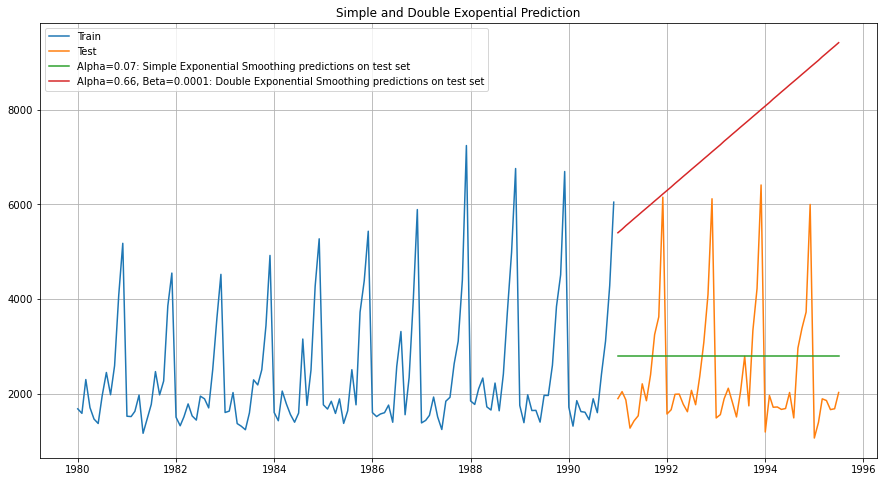

In [90]:
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(SES_predict, label="Alpha=0.07: Simple Exponential Smoothing predictions on test set")
plt.plot(des_predict, label="Alpha=0.66, Beta=0.0001: Double Exponential Smoothing predictions on test set")
plt.legend(loc="best")
plt.grid()
plt.title("Simple and Double Exopential Prediction")

In [91]:
print("DES RMSE: ", mean_squared_error(test.values, des_predict.values, squared=False))

DES RMSE:  5291.8798332269125


In [92]:
result_temp=pd.DataFrame({"RMSE": [mean_squared_error(test.values, des_predict.values, squared=False)]}, index=["Alpha=0.66, Beta=0.0001:DES"])
result_temp=pd.concat([result_temp, result_temp])
result_1

,RMSE
"Alpha=0.07,SESres",1338.000861


In [93]:
model_tes=ExponentialSmoothing(train, trend="additive", seasonal="additive", initialization_method="estimated")
model_tes=model_tes.fit()
print(" ")
print(" ==Holt Winters model Exponential Smoothing Estimated Parameters ==")
print(" ")
print(model_tes.params)

 
 ==Holt Winters model Exponential Smoothing Estimated Parameters ==
 
{'smoothing_level': 0.11127217693511166, 'smoothing_trend': 0.012360783126182025, 'smoothing_seasonal': 0.4607177659431463, 'damping_trend': nan, 'initial_level': 2356.5783078812697, 'initial_trend': -0.018442178724720648, 'initial_seasons': array([-636.23349205, -722.98346399, -398.64349841, -473.43073157,
       -808.42502897, -815.35019273, -384.23061339,   72.99513671,
       -237.44278517,  272.32607144, 1541.37826596, 2590.07759442]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [94]:
tes_predict=model_tes.forecast(len(test))
tes_predict

1991-01-01    1490.574618
1991-02-01    1204.714535
1991-03-01    1688.941336
1991-04-01    1551.451059
1991-05-01    1461.440697
1991-06-01    1278.907452
1991-07-01    1805.164331
1991-08-01    1679.251719
1991-09-01    2315.687997
1991-10-01    3225.309274
1991-11-01    4299.652749
1991-12-01    6411.161831
1992-01-01    1483.297096
1992-02-01    1197.437013
1992-03-01    1681.663814
1992-04-01    1544.173537
1992-05-01    1454.163175
1992-06-01    1271.629930
1992-07-01    1797.886809
1992-08-01    1671.974197
1992-09-01    2308.410475
1992-10-01    3218.031752
1992-11-01    4292.375227
1992-12-01    6403.884309
1993-01-01    1476.019574
1993-02-01    1190.159491
1993-03-01    1674.386292
1993-04-01    1536.896015
1993-05-01    1446.885653
1993-06-01    1264.352408
1993-07-01    1790.609287
1993-08-01    1664.696675
1993-09-01    2301.132953
1993-10-01    3210.754230
1993-11-01    4285.097705
1993-12-01    6396.606787
1994-01-01    1468.742052
1994-02-01    1182.881969
1994-03-01  

Text(0.5, 1.0, 'Simple, Double and Triple EXponential Smoothing prediction.')

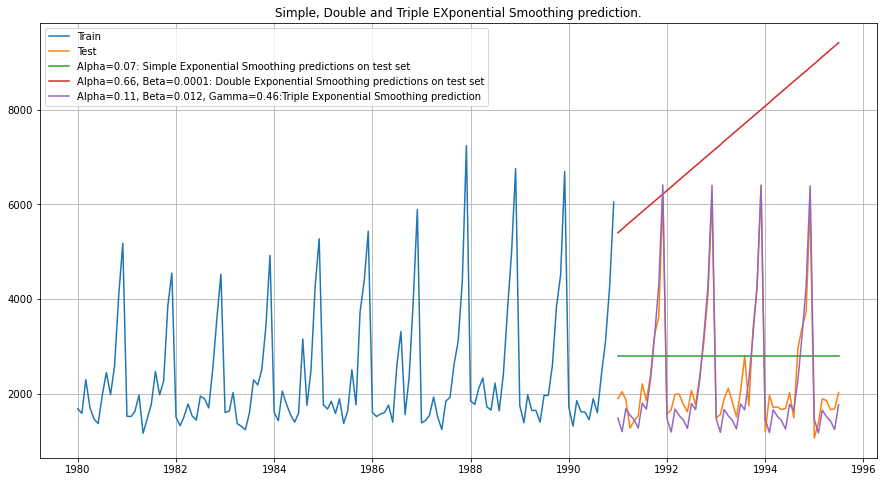

In [95]:
plt.plot(train,label="Train")
plt.plot(test, label="Test")

plt.plot(SES_predict, label="Alpha=0.07: Simple Exponential Smoothing predictions on test set")
plt.plot(des_predict, label="Alpha=0.66, Beta=0.0001: Double Exponential Smoothing predictions on test set")
plt.plot(tes_predict, label="Alpha=0.11, Beta=0.012, Gamma=0.46:Triple Exponential Smoothing prediction")
plt.legend(loc="best")
plt.grid()
plt.title("Simple, Double and Triple EXponential Smoothing prediction.")

In [96]:
print("TES RMSE:", mean_squared_error(test.values,tes_predict.values,squared=False))
     

TES RMSE: 378.6258830010025


In [97]:
result_temp=pd.DataFrame({"RMSE":[mean_squared_error(test.values,tes_predict, squared=False)]},  index=["Alpha=0.11, Beta=0.49, Gamma=0.36:TES"])
result_1=pd.concat([result_1,result_temp])

In [98]:
resultsDf=pd.concat([resultsDf,result_1])
resultsDf

,Test RMSE,RMSE
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
2pointTrailingMovingAverage,813.400684,NaN
4pointTrailingMovingAverage,1156.589694,NaN
6pointTrailingMovingAverage,1283.927428,NaN
9pointTrailingMovingAverage,1346.278315,NaN
"Alpha=0.07,SESres",NaN,1338.000861
"Alpha=0.11, Beta=0.49, Gamma=0.36:TES",NaN,378.625883


In [99]:
from statsmodels.tsa.stattools import adfuller

In [100]:
dftest=adfuller(df,regression="ct")
print("DF test statistics is %3.3f "%dftest[0])
print("DF test p-value is ", dftest[1])
print("Number of lags used ", dftest[2])

DF test statistics is -1.798 
DF test p-value is  0.7055958459932692
Number of lags used  12


<AxesSubplot:xlabel='YearMonth'>

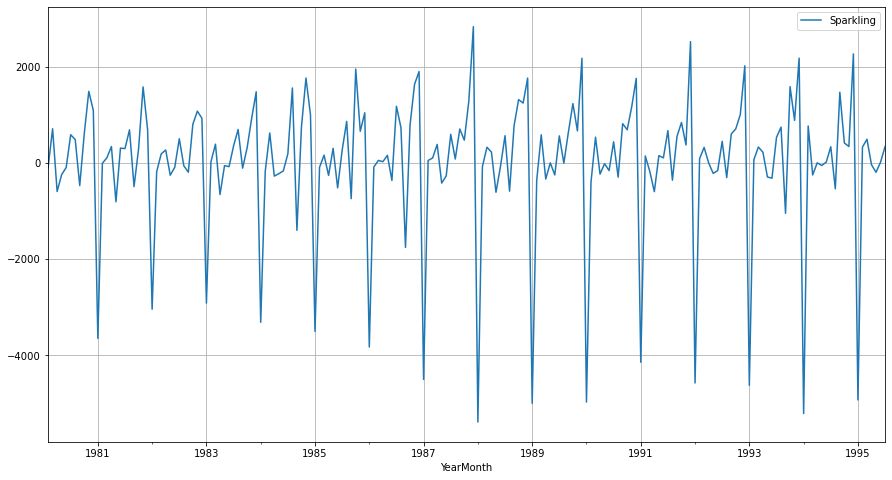

In [101]:
df.diff().dropna().plot(grid=True)

In [102]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

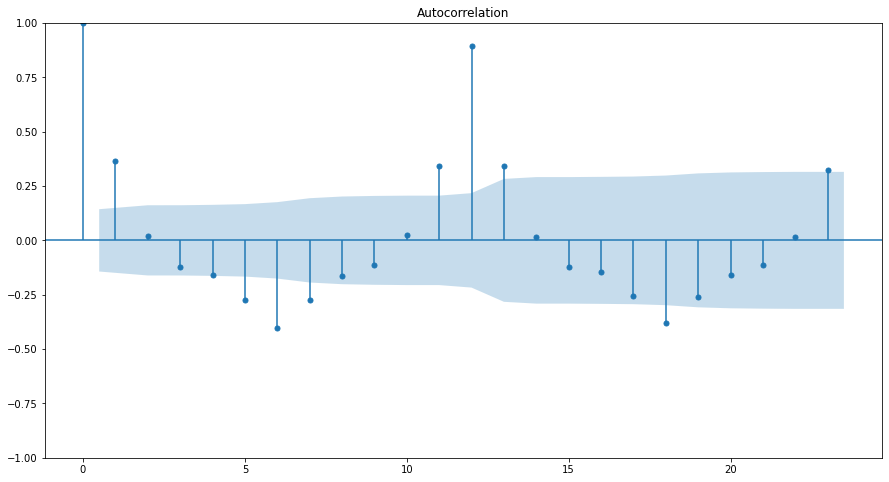

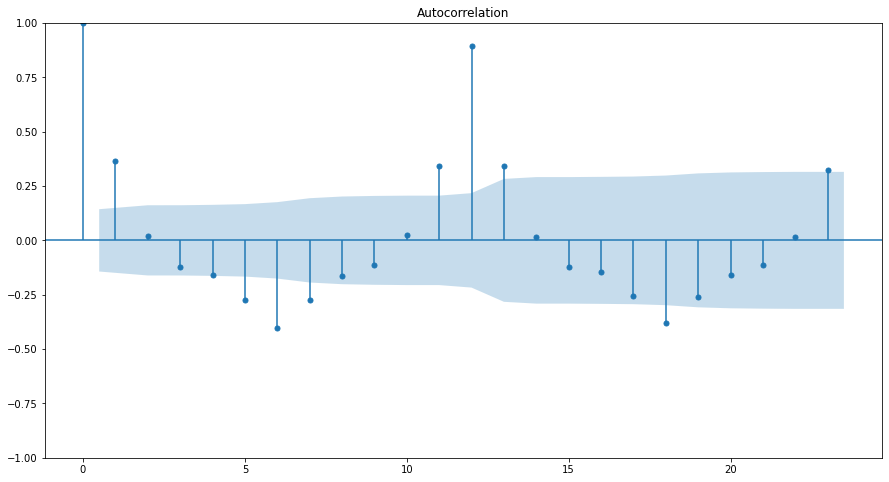

In [103]:
plot_acf(df, alpha=0.05)

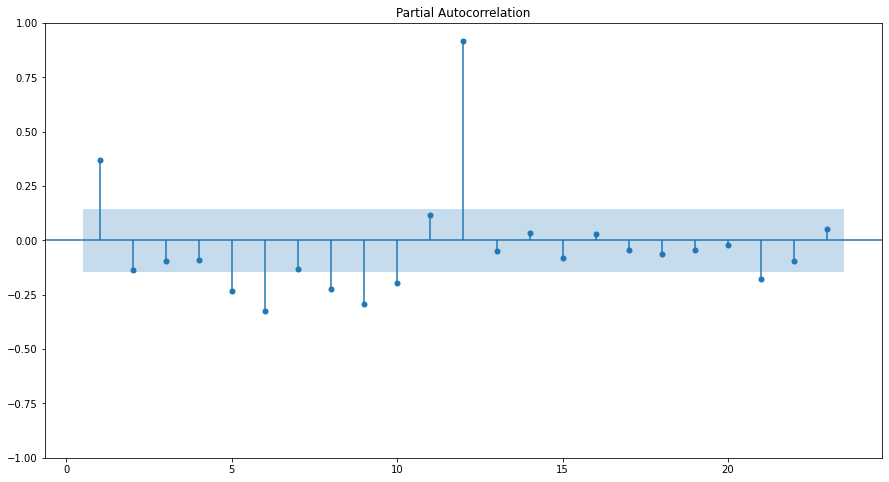

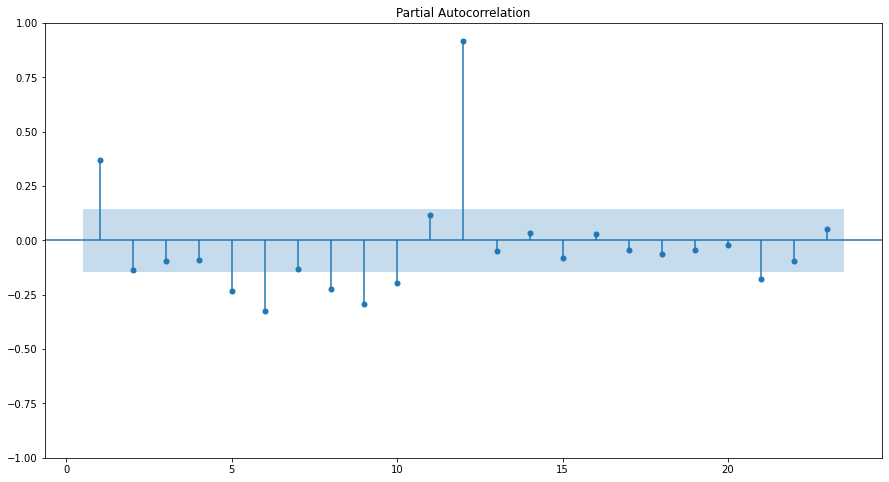

In [104]:
plot_pacf(df, zero=False, alpha=0.05)

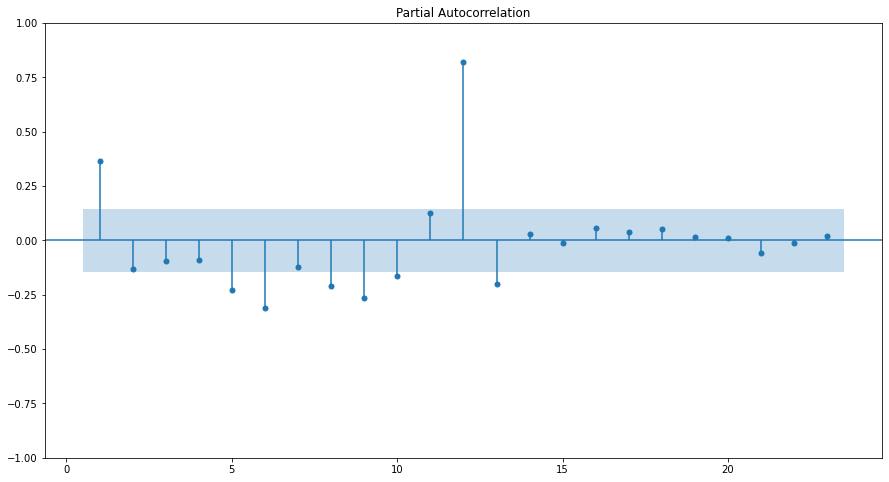

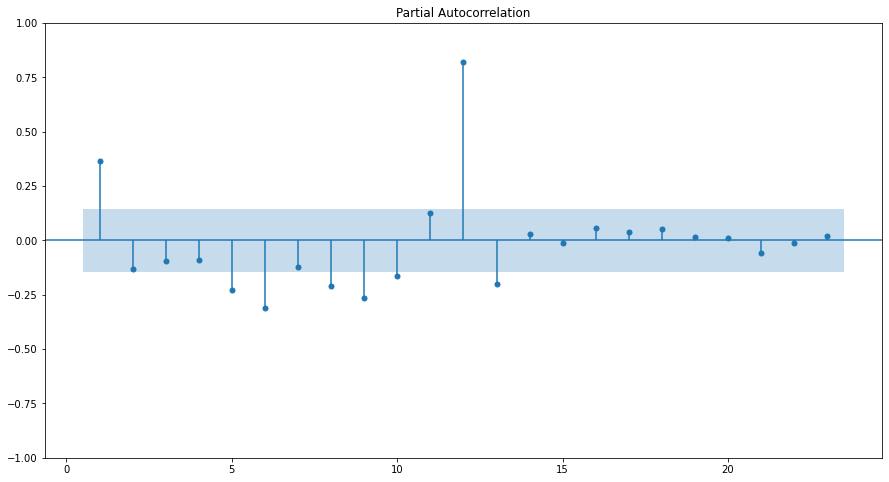

In [105]:
plot_pacf(df, zero=False, alpha=0.05, method="ywmle")

<AxesSubplot:xlabel='YearMonth'>

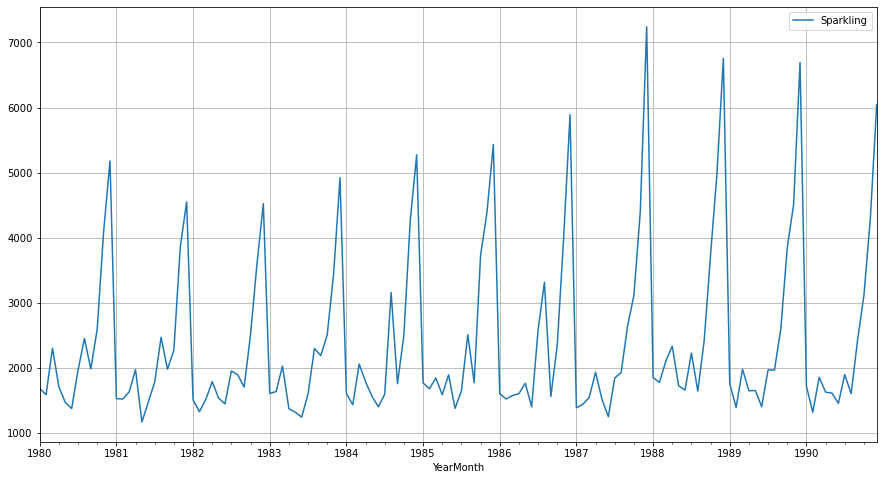

In [106]:
train.plot(grid=True)

In [107]:
dftest=adfuller(train,regression="ct")
print("DF test statistics is %3.3f "%dftest[0])
print("DF test p-value is ", dftest[1])
print("Number of lags used ", dftest[2])

DF test statistics is -2.062 
DF test p-value is  0.5674110388593684
Number of lags used  12


In [108]:
dftest=adfuller(train.diff().dropna(),regression="ct")
print("DF test statistics is %3.3f "%dftest[0])
print("DF test p-value is ", dftest[1])
print("Number of lags used ", dftest[2])

DF test statistics is -7.968 
DF test p-value is  8.47921065551504e-11
Number of lags used  11


<AxesSubplot:xlabel='YearMonth'>

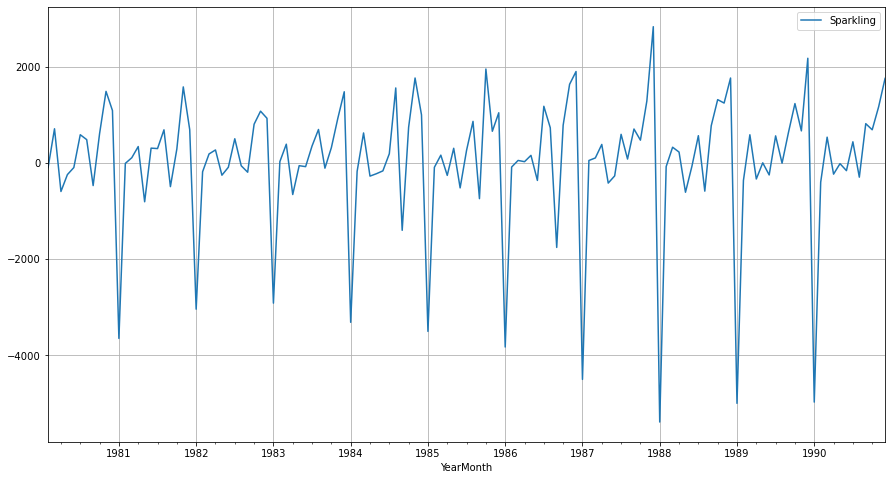

In [109]:
train.diff().dropna().plot(grid=True)

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [111]:
import itertools
p = q = range(0,4)
d = range(1,2)
pdq=list(itertools.product(p,d,q))
print("Examples of the parameter combination for the model")
for i in range(0, len(pdq)):
    print("Model: {}".format(pdq[i]))

Examples of the parameter combination for the model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [112]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [113]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train["Sparkling"].values, order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015592223
ARIMA(0, 1, 2) - AIC:2234.4083231226628
ARIMA(0, 1, 3) - AIC:2233.994857739737
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946704996
ARIMA(1, 1, 2) - AIC:2234.527200452125
ARIMA(1, 1, 3) - AIC:2235.6078154783027
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626228905
ARIMA(2, 1, 2) - AIC:2213.509212423273


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.8113519358258
ARIMA(3, 1, 0) - AIC:2257.7233789979387
ARIMA(3, 1, 1) - AIC:2235.498899377492


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.829849760188
ARIMA(3, 1, 3) - AIC:2221.4616892285576


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [114]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",2213.509212
15,"(3, 1, 3)",2221.461689
14,"(3, 1, 2)",2230.82985
11,"(2, 1, 3)",2232.811352
9,"(2, 1, 1)",2233.777626


In [115]:
auto_ARIMA = ARIMA(train, order=(2,1,2))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Wed, 01 Nov 2023   AIC                           2213.509
Time:                        16:23:23   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

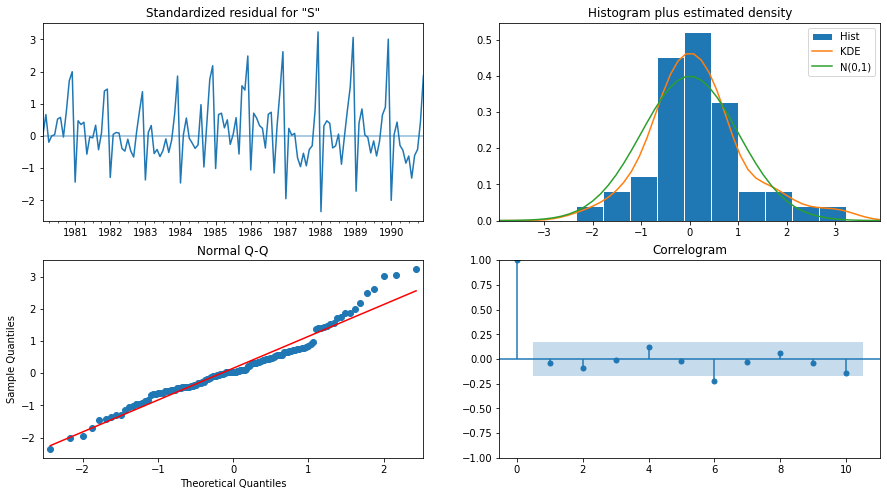

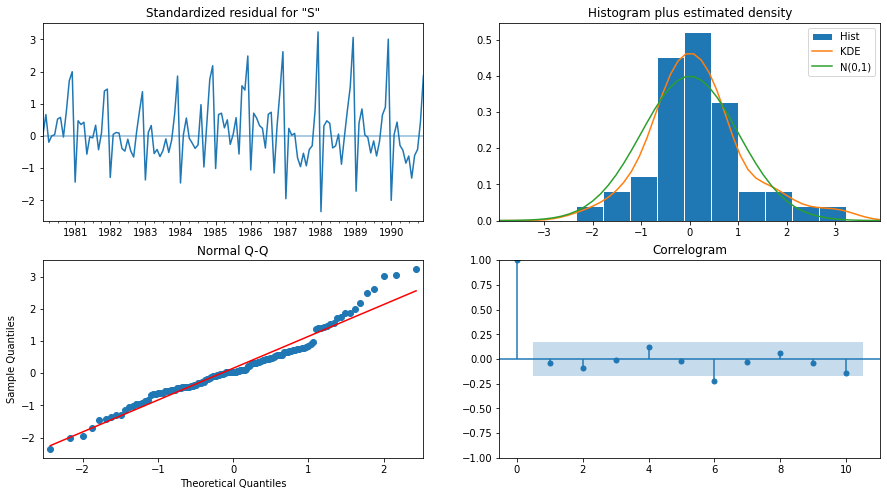

In [116]:
results_auto_ARIMA.plot_diagnostics()

In [117]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [118]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/y_true*100)

In [119]:
rmse=mean_squared_error(test["Sparkling"],predicted_auto_ARIMA, squared=False)
mape=mean_absolute_percentage_error(test["Sparkling"],predicted_auto_ARIMA)
print("RMSE: ",rmse, "\nMAPE:", mape)

RMSE:  1299.979592305803 
MAPE: 47.099959718135125


In [121]:
result_2=pd.DataFrame({"RMSE": rmse, "MAPE":mape}
                     ,index=["ARIMA(2,1,2)"])
result_2

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979592,47.09996


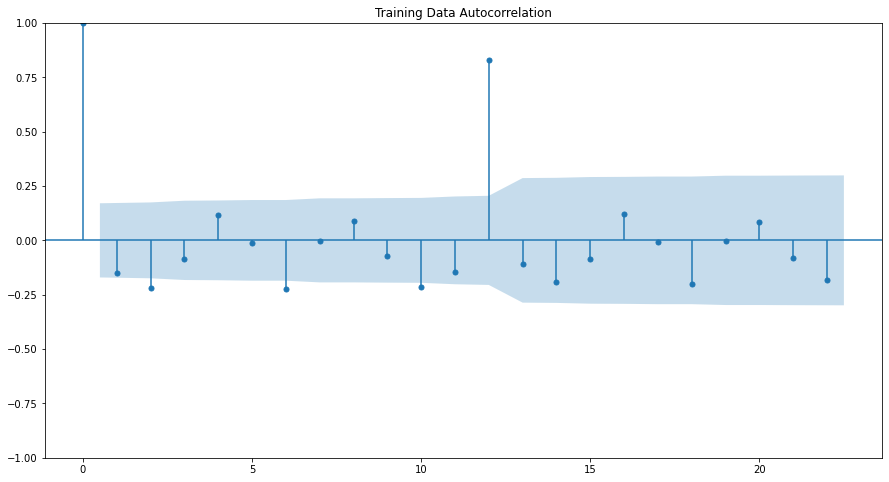

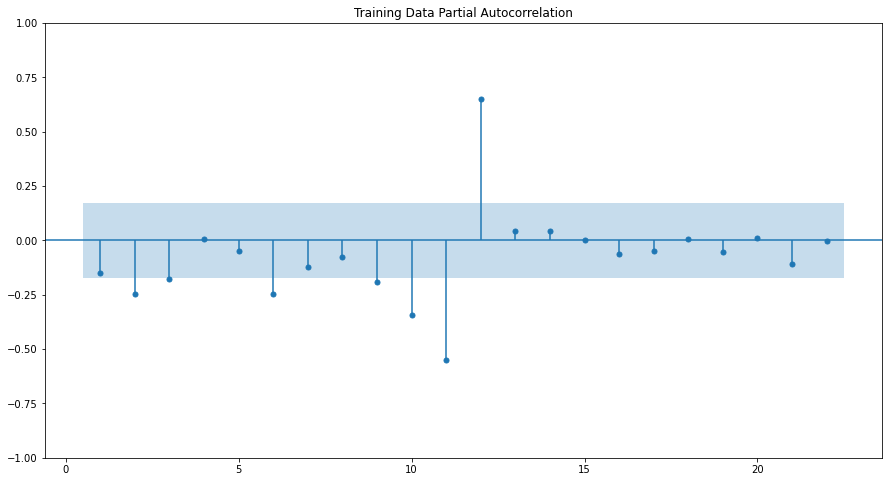

In [123]:
plot_acf(train.diff(),title="Training Data Autocorrelation", missing="drop")
plot_pacf(train.diff().dropna(),title="Training Data Partial Autocorrelation", zero=False, method="ywmle")
plt.show()

In [124]:
manual_ARIMA=ARIMA(train["Sparkling"], order=(3,1,3))
results_manual_ARIMA=manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1103.731
Date:                Wed, 01 Nov 2023   AIC                           2221.462
Time:                        16:32:44   BIC                           2241.588
Sample:                    01-01-1980   HQIC                          2229.640
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4758      0.143      3.320      0.001       0.195       0.757
ar.L2         -0.9865      0.052    -18.806      0.000      -1.089      -0.884
ar.L3          0.4821      0.117      4.115      0.0

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


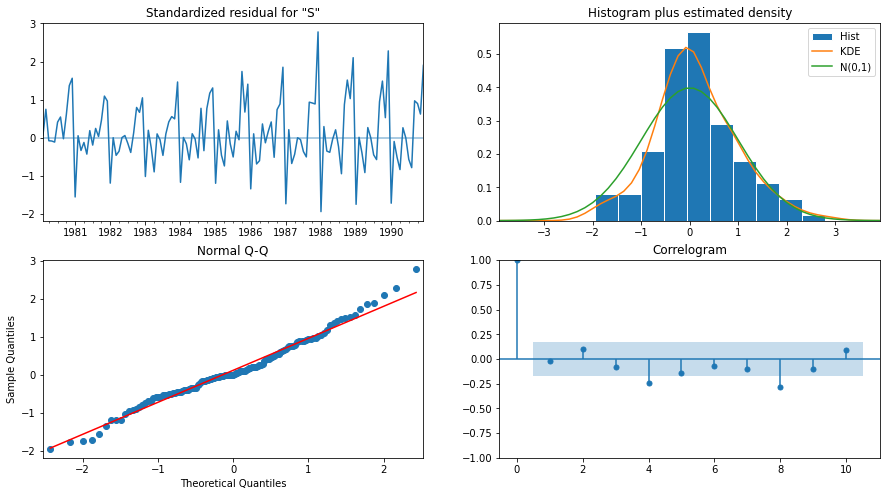

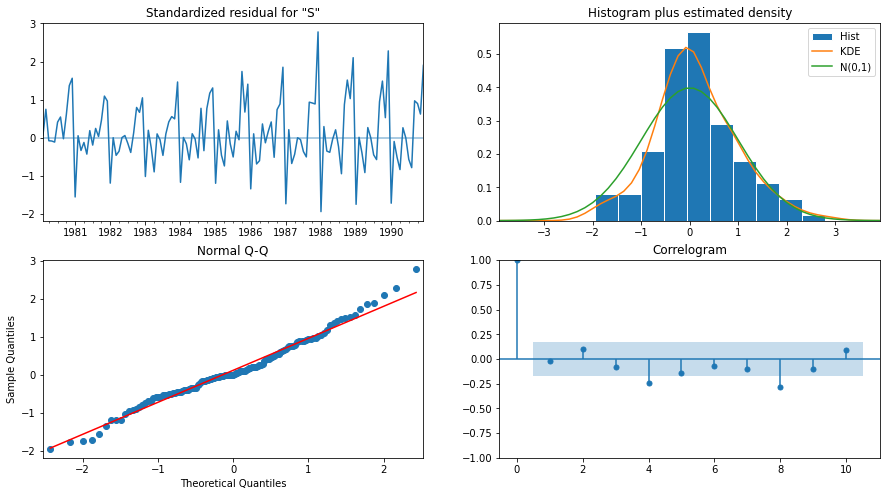

In [125]:
results_manual_ARIMA.plot_diagnostics()

In [126]:
predicted_manual_ARIMA=results_manual_ARIMA.forecast(steps=len(test))

In [127]:
rmse=mean_squared_error(test["Sparkling"],predicted_manual_ARIMA, squared=False)
mape=mean_absolute_percentage_error(test["Sparkling"], predicted_manual_ARIMA)
print("RMSE:",rmse,"\nMAPE:",mape)

RMSE: 1228.3563979444584 
MAPE: 39.46853130690419


In [128]:
temp_result=pd.DataFrame({"RMSE":rmse,"MAPE":mape},
                        index=["ARIMA(3,1,3)"])
result_2=pd.concat([result_2, temp_result])

In [129]:
result_2

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979592,47.099960
"ARIMA(3,1,3)",1228.356398,39.468531


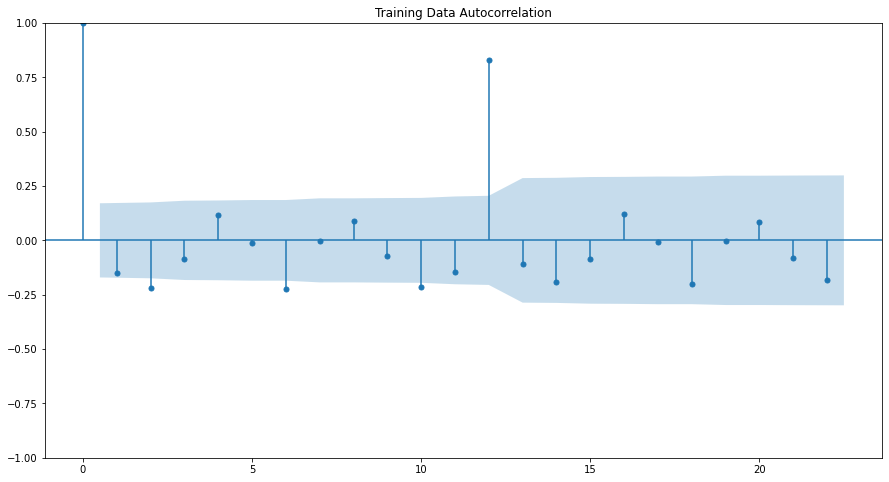

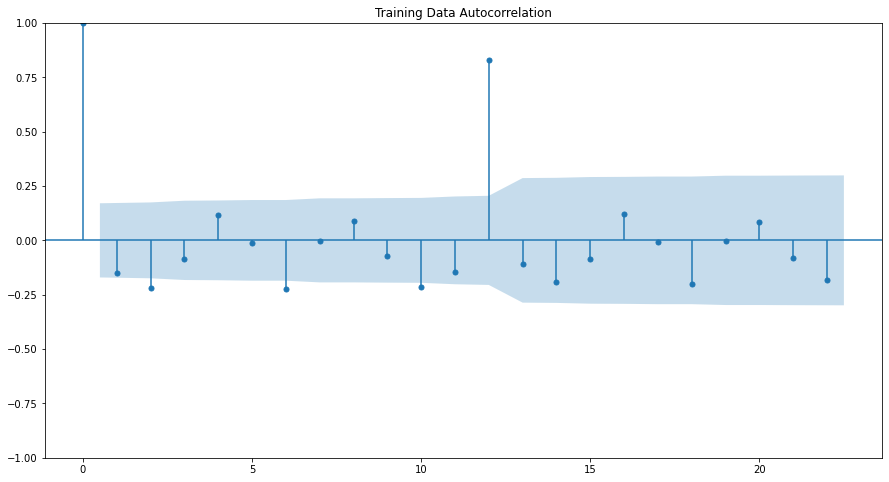

In [130]:
plot_acf(train.diff(),title="Training Data Autocorrelation", missing="drop")

In [131]:
import itertools
p=q=range(0,4)
d=range(1,2)
D=range(1,2)
pdq=list(itertools.product(p,d,q))
PDQ=[(x[0], x[1], x[2], 12) for x in list(itertools.product(p,D,q))]
print("Examples of the parameter combinations for the model are")
for i in range(1, len(pdq)):
    print("model: {}{}".format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the model are
model: (0, 1, 1)(0, 1, 1, 12)
model: (0, 1, 2)(0, 1, 2, 12)
model: (0, 1, 3)(0, 1, 3, 12)
model: (1, 1, 0)(1, 1, 0, 12)
model: (1, 1, 1)(1, 1, 1, 12)
model: (1, 1, 2)(1, 1, 2, 12)
model: (1, 1, 3)(1, 1, 3, 12)
model: (2, 1, 0)(2, 1, 0, 12)
model: (2, 1, 1)(2, 1, 1, 12)
model: (2, 1, 2)(2, 1, 2, 12)
model: (2, 1, 3)(2, 1, 3, 12)
model: (3, 1, 0)(3, 1, 0, 12)
model: (3, 1, 1)(3, 1, 1, 12)
model: (3, 1, 2)(3, 1, 2, 12)
model: (3, 1, 3)(3, 1, 3, 12)


In [132]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [139]:
import statsmodels.api as sm

In [142]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model=sm.tsa.statespace.SARIMAX(train["Sparkling"].values,
                                              order=param, seasonal_order=param_seasonal,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
        result_SARIMA=SARIMA_model.fit(maxiter=1000)
        print("SARIMA{}x{} - AIC:{}".format(param,param_seasonal, result_SARIMA.aic))
        SARIMA_AIC=SARIMA_AIC.append({"param":param,"seasonal":param_seasonal,"AIC":result_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1626.8626334678277
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.6773574250167


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:2983.066290560416
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1646.377816766144
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1628.3243908182164
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1454.5289621307418


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:3506.247995358872
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1468.5000981866633
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1455.991155363833


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 1, 3, 12) - AIC:3216.1155644841515
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:1289.239819743992
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:1291.2448875094224
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:1288.6070380328838


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 1, 3, 12) - AIC:4044.235037576227
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1760.6565719828473
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1569.6639234229967
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:1399.1083846680508
SARIMA(0, 1, 1)x(0, 1, 3, 12) - AIC:2923.430595014552
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1602.859481902387
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1570.8550259195667
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:1400.6709524137211


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 1, 3, 12) - AIC:3568.088207294913
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:1428.244881112965
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:1429.616802796344
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:1402.6385888474351


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 1, 3, 12) - AIC:3593.2902199386426
SARIMA(0, 1, 1)x(3, 1, 0, 12) - AIC:1255.578454293147
SARIMA(0, 1, 1)x(3, 1, 1, 12) - AIC:1257.4558568590273
SARIMA(0, 1, 1)x(3, 1, 2, 12) - AIC:1258.2925125564814


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 1, 3, 12) - AIC:3672.99511298932
SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:1741.3207220431727
SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:1554.7429039622275
SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:1382.4842540777709


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 1, 3, 12) - AIC:3367.0839843246777
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:1601.758729300125
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:1556.155971616442
SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:1384.3988672020057


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 1, 3, 12) - AIC:3186.2752361497583
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:1427.0773414538965
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:1428.5534767508957
SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:1386.0237342779255


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 1, 3, 12) - AIC:3060.31905053793
SARIMA(0, 1, 2)x(3, 1, 0, 12) - AIC:1254.6525579265208
SARIMA(0, 1, 2)x(3, 1, 1, 12) - AIC:1256.986663402197
SARIMA(0, 1, 2)x(3, 1, 2, 12) - AIC:1257.42532624822
SARIMA(0, 1, 2)x(3, 1, 3, 12) - AIC:3285.0360607025796
SARIMA(0, 1, 3)x(0, 1, 0, 12) - AIC:1727.2607378275359
SARIMA(0, 1, 3)x(0, 1, 1, 12) - AIC:1540.7948184312907
SARIMA(0, 1, 3)x(0, 1, 2, 12) - AIC:1369.9603671034756


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 1, 3, 12) - AIC:2564.6772485587694
SARIMA(0, 1, 3)x(1, 1, 0, 12) - AIC:1602.1924100607864
SARIMA(0, 1, 3)x(1, 1, 1, 12) - AIC:1542.6814540453381
SARIMA(0, 1, 3)x(1, 1, 2, 12) - AIC:1371.7363271382242


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 1, 3, 12) - AIC:3474.4320200372986
SARIMA(0, 1, 3)x(2, 1, 0, 12) - AIC:1428.389685687629
SARIMA(0, 1, 3)x(2, 1, 1, 12) - AIC:1429.826518138914
SARIMA(0, 1, 3)x(2, 1, 2, 12) - AIC:1373.4524731840584


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 1, 3, 12) - AIC:3603.859803932067
SARIMA(0, 1, 3)x(3, 1, 0, 12) - AIC:1256.0020281099023
SARIMA(0, 1, 3)x(3, 1, 1, 12) - AIC:1258.0747613575465
SARIMA(0, 1, 3)x(3, 1, 2, 12) - AIC:1258.9452629438988


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 1, 3, 12) - AIC:3249.5431843883534
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1810.9513015567375
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1613.740703341053
SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:1441.4259994233964


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 1, 3, 12) - AIC:3229.5567407538542
SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:1619.6703363510771
SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:1615.7404485275945
SARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:1443.1035528175214


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 1, 3, 12) - AIC:3231.579709176547
SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:1440.574162809936
SARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:1442.5059371251305
SARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:1444.4274245939505


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 1, 3, 12) - AIC:3981.3236616903823
SARIMA(1, 1, 0)x(3, 1, 0, 12) - AIC:1265.1747644704742
SARIMA(1, 1, 0)x(3, 1, 1, 12) - AIC:1267.1592027274555
SARIMA(1, 1, 0)x(3, 1, 2, 12) - AIC:1263.9849693884305


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 1, 3, 12) - AIC:4060.0153086636424
SARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1757.3654162744765
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1569.3827366812868
SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:1398.756167222447


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 1, 3, 12) - AIC:2763.3780032097598
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:1588.0655672689488
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1570.6724644580804
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:1400.4523886152124


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:3277.95742577768
SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:1413.5679859615907
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:1414.8736681604414
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:1402.2732672823597


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 1, 3, 12) - AIC:3276.5301534848822
SARIMA(1, 1, 1)x(3, 1, 0, 12) - AIC:1240.8275546143507
SARIMA(1, 1, 1)x(3, 1, 1, 12) - AIC:1242.6640988794231
SARIMA(1, 1, 1)x(3, 1, 2, 12) - AIC:1243.1145005378587


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 1, 3, 12) - AIC:2910.0249349264786
SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:1742.7366275438428
SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:1554.958413901275
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:1382.3477800330504


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 1, 3, 12) - AIC:3160.5060822913583
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:1585.786090092126
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:1556.1300441713493
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:1384.1378738619455


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:3122.7538686893085
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:1411.9924109673505
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:1413.5918293840655
SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:1385.6887207714424


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:3155.739075759422
SARIMA(1, 1, 2)x(3, 1, 0, 12) - AIC:1240.439793941173
SARIMA(1, 1, 2)x(3, 1, 1, 12) - AIC:1242.3340377999677
SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:1242.9811907010007


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:3232.9736683218384
SARIMA(1, 1, 3)x(0, 1, 0, 12) - AIC:1727.0466394219147
SARIMA(1, 1, 3)x(0, 1, 1, 12) - AIC:1541.6027948057376
SARIMA(1, 1, 3)x(0, 1, 2, 12) - AIC:1370.6605716693646


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 1, 3, 12) - AIC:5661.678575569176
SARIMA(1, 1, 3)x(1, 1, 0, 12) - AIC:1587.782481939867
SARIMA(1, 1, 3)x(1, 1, 1, 12) - AIC:1544.6047622976587
SARIMA(1, 1, 3)x(1, 1, 2, 12) - AIC:1372.2143069543356
SARIMA(1, 1, 3)x(1, 1, 3, 12) - AIC:6121.873232077235
SARIMA(1, 1, 3)x(2, 1, 0, 12) - AIC:1413.9496333295106
SARIMA(1, 1, 3)x(2, 1, 1, 12) - AIC:1415.5604694492215
SARIMA(1, 1, 3)x(2, 1, 2, 12) - AIC:1373.7153020199949
SARIMA(1, 1, 3)x(2, 1, 3, 12) - AIC:20.0
SARIMA(1, 1, 3)x(3, 1, 0, 12) - AIC:1242.833094872323
SARIMA(1, 1, 3)x(3, 1, 1, 12) - AIC:1244.822746770223
SARIMA(1, 1, 3)x(3, 1, 2, 12) - AIC:1245.4466247092253
SARIMA(1, 1, 3)x(3, 1, 3, 12) - AIC:5044.888027354982
SARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:1779.6359486658962
SARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC:1599.8657465662257
SARIMA(2, 1, 0)x(0, 1, 2, 12) - AIC:1429.602321491033


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 1, 3, 12) - AIC:3010.9171772745476
SARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC:1590.6714007730457
SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:1587.5144246574846
SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:1431.187313588125


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 1, 3, 12) - AIC:3234.2224828280514
SARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:1413.6736725425565
SARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:1415.6324295193058
SARIMA(2, 1, 0)x(2, 1, 2, 12) - AIC:1417.3668472984823


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 1, 3, 12) - AIC:3331.9783667987454
SARIMA(2, 1, 0)x(3, 1, 0, 12) - AIC:1240.891751219928
SARIMA(2, 1, 0)x(3, 1, 1, 12) - AIC:1242.8745815841512
SARIMA(2, 1, 0)x(3, 1, 2, 12) - AIC:1242.799170336969


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 1, 3, 12) - AIC:3365.9013450768166
SARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:1758.5616376866994
SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:1570.175592261048
SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:1400.209858180731


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 1, 3, 12) - AIC:3178.692187343319
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:1574.3724067255678
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:1571.8577388008641
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:1401.9104199707358


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:3472.572029701588
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:1400.9854069823737
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:1401.9924735487061
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:1403.8183454537325
SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:3341.749596947908
SARIMA(2, 1, 1)x(3, 1, 0, 12) - AIC:1228.3132766082879
SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:1230.1483342045713
SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:1230.7597823075168


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:3410.1341873423326
SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1742.2930721640575
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:1556.9467324122866
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:1384.317618064532


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 1, 3, 12) - AIC:3124.928536038621
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:1573.1168644412323
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1558.1200892481875
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:1386.097242019365


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:2791.4128685437436
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:1399.775633999168
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:1401.1832161212205
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:1387.6277846296102


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 3, 12) - AIC:2292.247766618868
SARIMA(2, 1, 2)x(3, 1, 0, 12) - AIC:1228.3971677411762
SARIMA(2, 1, 2)x(3, 1, 1, 12) - AIC:1230.2093707076735
SARIMA(2, 1, 2)x(3, 1, 2, 12) - AIC:1230.685681707137


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 3, 12) - AIC:2858.147795892573
SARIMA(2, 1, 3)x(0, 1, 0, 12) - AIC:1729.0080415019877
SARIMA(2, 1, 3)x(0, 1, 1, 12) - AIC:1539.8879486920644
SARIMA(2, 1, 3)x(0, 1, 2, 12) - AIC:1368.1431517940987
SARIMA(2, 1, 3)x(0, 1, 3, 12) - AIC:6017.7761311106515
SARIMA(2, 1, 3)x(1, 1, 0, 12) - AIC:1571.566914153416
SARIMA(2, 1, 3)x(1, 1, 1, 12) - AIC:1539.5107938326469
SARIMA(2, 1, 3)x(1, 1, 2, 12) - AIC:1369.7747278602328
SARIMA(2, 1, 3)x(1, 1, 3, 12) - AIC:413.0408182826738
SARIMA(2, 1, 3)x(2, 1, 0, 12) - AIC:1396.0596575336624
SARIMA(2, 1, 3)x(2, 1, 1, 12) - AIC:1397.8640325168617
SARIMA(2, 1, 3)x(2, 1, 2, 12) - AIC:1370.3569974519696
SARIMA(2, 1, 3)x(2, 1, 3, 12) - AIC:22.0
SARIMA(2, 1, 3)x(3, 1, 0, 12) - AIC:1229.4698531996887
SARIMA(2, 1, 3)x(3, 1, 1, 12) - AIC:1227.8251313040796
SARIMA(2, 1, 3)x(3, 1, 2, 12) - AIC:1229.1524807129008
SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:6226.233553159212
SARIMA(3, 1, 0)x(0, 1, 0, 12) - AIC:1761.4099815082702
SARIMA(3, 1, 0)x(0, 1, 1, 12

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 1, 3, 12) - AIC:2815.9104728465018
SARIMA(3, 1, 0)x(1, 1, 0, 12) - AIC:1576.8309567177048
SARIMA(3, 1, 0)x(1, 1, 1, 12) - AIC:1574.5127601475308
SARIMA(3, 1, 0)x(1, 1, 2, 12) - AIC:1431.9534628515003


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 1, 3, 12) - AIC:3305.058694784725
SARIMA(3, 1, 0)x(2, 1, 0, 12) - AIC:1398.5970048037398
SARIMA(3, 1, 0)x(2, 1, 1, 12) - AIC:1400.474080360001
SARIMA(3, 1, 0)x(2, 1, 2, 12) - AIC:1402.5527499414518


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 1, 3, 12) - AIC:2942.637912106042
SARIMA(3, 1, 0)x(3, 1, 0, 12) - AIC:1227.4630824825335
SARIMA(3, 1, 0)x(3, 1, 1, 12) - AIC:1229.4324419590412
SARIMA(3, 1, 0)x(3, 1, 2, 12) - AIC:1229.1153342189577


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 1, 3, 12) - AIC:3019.9670120572227
SARIMA(3, 1, 1)x(0, 1, 0, 12) - AIC:1744.6939375469744
SARIMA(3, 1, 1)x(0, 1, 1, 12) - AIC:1572.0715279675762
SARIMA(3, 1, 1)x(0, 1, 2, 12) - AIC:1401.6807316913246


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 1, 3, 12) - AIC:3180.0900403659116
SARIMA(3, 1, 1)x(1, 1, 0, 12) - AIC:1561.8477975464095
SARIMA(3, 1, 1)x(1, 1, 1, 12) - AIC:1559.693163194439
SARIMA(3, 1, 1)x(1, 1, 2, 12) - AIC:1403.3936813024238


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 1, 3, 12) - AIC:3131.7592622514935
SARIMA(3, 1, 1)x(2, 1, 0, 12) - AIC:1385.8871646620228
SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:1387.5203747546275
SARIMA(3, 1, 1)x(2, 1, 2, 12) - AIC:1389.4969785789926


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 1, 3, 12) - AIC:3222.2756866706186
SARIMA(3, 1, 1)x(3, 1, 0, 12) - AIC:1215.8987770405297
SARIMA(3, 1, 1)x(3, 1, 1, 12) - AIC:1217.7138947630115
SARIMA(3, 1, 1)x(3, 1, 2, 12) - AIC:1218.4160436475613


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 3, 12) - AIC:3135.102311013178
SARIMA(3, 1, 2)x(0, 1, 0, 12) - AIC:1744.1714487334605
SARIMA(3, 1, 2)x(0, 1, 1, 12) - AIC:1560.2179700535175
SARIMA(3, 1, 2)x(0, 1, 2, 12) - AIC:1385.875454222651
SARIMA(3, 1, 2)x(0, 1, 3, 12) - AIC:3170.788572369519
SARIMA(3, 1, 2)x(1, 1, 0, 12) - AIC:1563.16829893937
SARIMA(3, 1, 2)x(1, 1, 1, 12) - AIC:1559.6863577428444
SARIMA(3, 1, 2)x(1, 1, 2, 12) - AIC:1387.7123926569698
SARIMA(3, 1, 2)x(1, 1, 3, 12) - AIC:3259.2714548879703
SARIMA(3, 1, 2)x(2, 1, 0, 12) - AIC:1387.8884447440478
SARIMA(3, 1, 2)x(2, 1, 1, 12) - AIC:1387.2131038652844
SARIMA(3, 1, 2)x(2, 1, 2, 12) - AIC:1389.2046663207345


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 3, 12) - AIC:3283.9724833024484
SARIMA(3, 1, 2)x(3, 1, 0, 12) - AIC:1216.859179860321
SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:1218.9913842243425
SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:1219.259977566683


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:2707.9992423969115
SARIMA(3, 1, 3)x(0, 1, 0, 12) - AIC:1730.9862392391883
SARIMA(3, 1, 3)x(0, 1, 1, 12) - AIC:1541.4285446393892
SARIMA(3, 1, 3)x(0, 1, 2, 12) - AIC:1372.412494548828


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 1, 3, 12) - AIC:2499.9494872244222
SARIMA(3, 1, 3)x(1, 1, 0, 12) - AIC:1559.5316682059574
SARIMA(3, 1, 3)x(1, 1, 1, 12) - AIC:1543.6142454777425
SARIMA(3, 1, 3)x(1, 1, 2, 12) - AIC:1374.3118267265395


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 1, 3, 12) - AIC:2785.969375810887
SARIMA(3, 1, 3)x(2, 1, 0, 12) - AIC:1383.022378795373
SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:1384.8827045804162
SARIMA(3, 1, 3)x(2, 1, 2, 12) - AIC:1372.2208233461133


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:2570.610507918022
SARIMA(3, 1, 3)x(3, 1, 0, 12) - AIC:1213.2826032778444
SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:1215.2133727020068
SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:1216.4799898517108


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:2847.5574251371722


In [143]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

,param,seasonal,AIC
123,"(1, 1, 3)","(2, 1, 3, 12)",20.0
187,"(2, 1, 3)","(2, 1, 3, 12)",22.0
183,"(2, 1, 3)","(1, 1, 3, 12)",413.040818
252,"(3, 1, 3)","(3, 1, 0, 12)",1213.282603
253,"(3, 1, 3)","(3, 1, 1, 12)",1215.213373


In [146]:
# best sarima model with the best parameters
auto_SARIMA = sm.tsa.statespace.SARIMAX(train["Sparkling"],
                                      order=(3, 1, 3),
                                      seasonal_order=(3,1,0,12),
                                      enforce_stationarity=False,
                                       enforce_invertibility=False)
result_auto_SARIMA=auto_SARIMA.fit(maxiter=1000)
print(result_auto_SARIMA.summary())

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -596.641
Date:                             Thu, 02 Nov 2023   AIC                           1213.283
Time:                                     07:21:05   BIC                           1237.103
Sample:                                 01-01-1980   HQIC                          1222.833
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6138      0.176     -9.178      0.000      -1.958      -1.269
ar.L2         -0.6116      

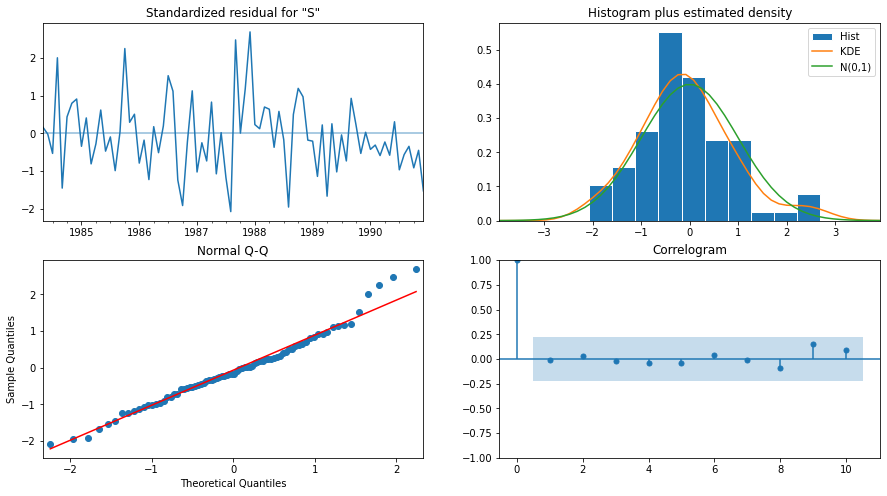

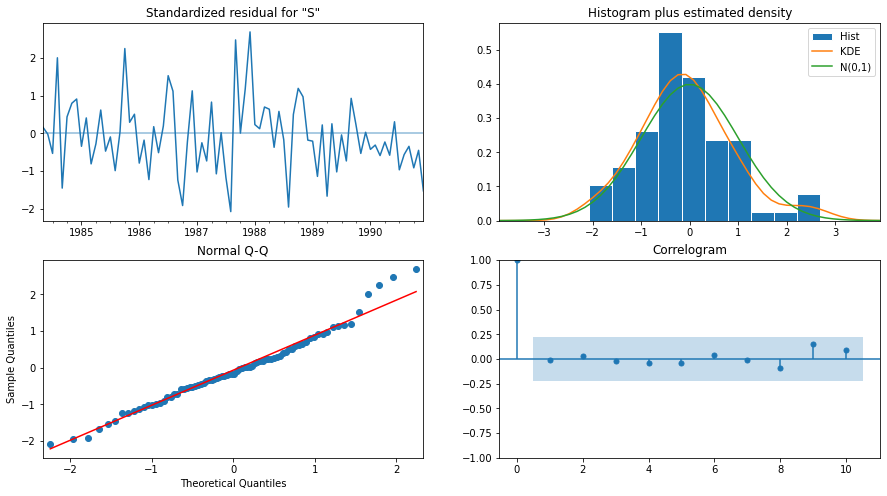

In [147]:
result_auto_SARIMA.plot_diagnostics()

In [149]:
predicted_auto_SARIMA=result_auto_SARIMA.get_forecast(steps=len(test))

In [151]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,1431.095445,431.190503,585.977589,2276.213300
1991-02-01,1540.853240,458.380686,642.443604,2439.262877
1991-03-01,1708.092916,460.155157,806.205381,2609.980451
1991-04-01,1859.516878,466.703167,944.795479,2774.238277
1991-05-01,1502.201378,467.007442,586.883610,2417.519146


In [152]:
rmse=mean_squared_error(test["Sparkling"],predicted_auto_SARIMA.predicted_mean, squared=False)
mape=mean_absolute_percentage_error(test["Sparkling"], predicted_auto_SARIMA.predicted_mean)
print("RMSE:",rmse,"\nMAPE:",mape)

RMSE: 331.4667558244952 
MAPE: 11.852174872378615


In [153]:
temp_result=pd.DataFrame({"RMSE": rmse, "MAPE":mape}
                     ,index=["SARIMA(3,1,3)(3,2,0,23)"])
result_2=pd.concat([result_2,temp_result])
result_2

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979592,47.099960
"ARIMA(3,1,3)",1228.356398,39.468531
"SARIMA(3,1,3)(3,2,0,23)",331.466756,11.852175


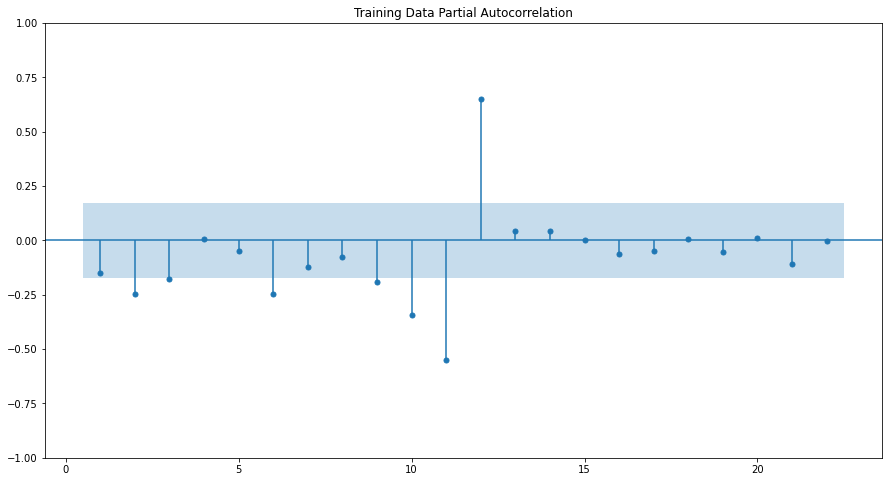

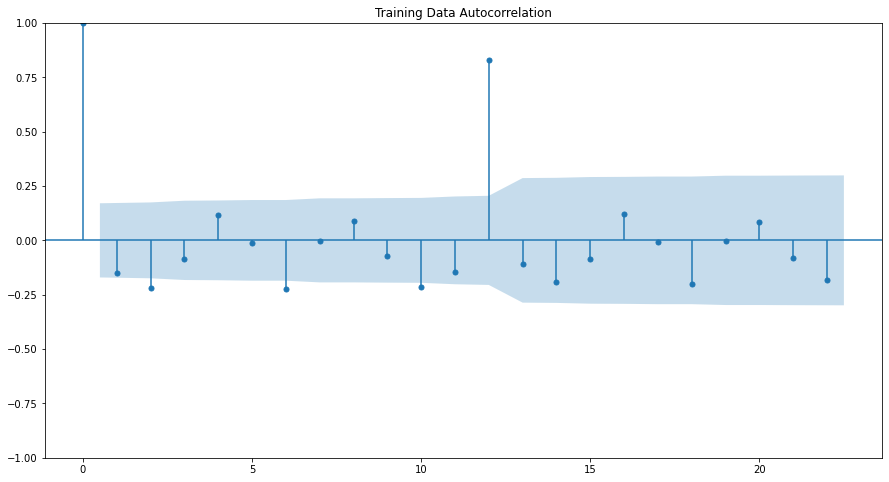

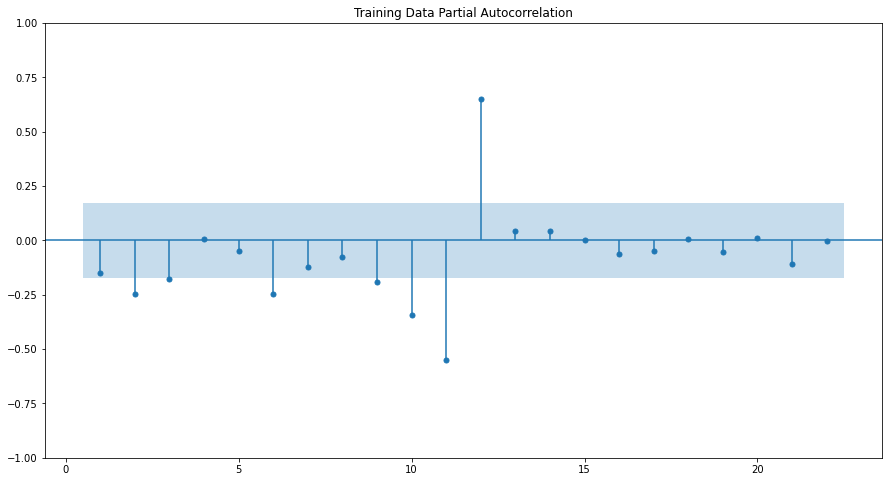

In [154]:
plot_acf(train.diff(),title="Training Data Autocorrelation", missing="drop")
plot_pacf(train.diff().dropna(),title="Training Data Partial Autocorrelation", zero=False, method="ywmle")

In [155]:
manual_SARIMA=sm.tsa.statespace.SARIMAX(train["Sparkling"],
                                              order=(3,1,1), seasonal_order=(1,1,2,12),
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
result_manual_SARIMA=manual_SARIMA.fit(maxiter=1000)
print(result_manual_SARIMA.summary())

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -693.697
Date:                                 Thu, 02 Nov 2023   AIC                           1403.394
Time:                                         07:29:39   BIC                           1423.654
Sample:                                     01-01-1980   HQIC                          1411.574
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.713      0.087      -0.032       0

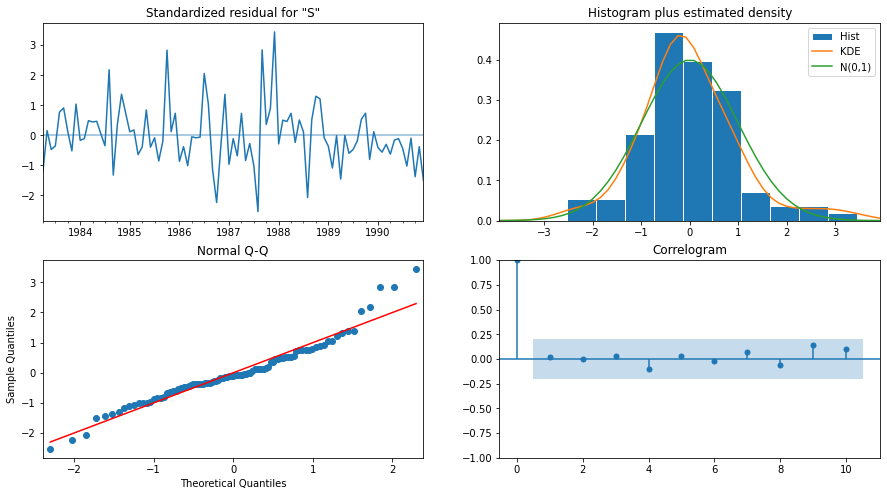

In [157]:
result_manual_SARIMA.plot_diagnostics()
plt.show()

In [158]:
predicted_manual_SARIMA=result_manual_SARIMA.get_forecast(steps=len(test))

In [159]:
rmse=mean_squared_error(test["Sparkling"],predicted_manual_SARIMA.predicted_mean, squared=False)
mape=mean_absolute_percentage_error(test["Sparkling"], predicted_manual_SARIMA.predicted_mean)
print("RMSE:",rmse,"\nMAPE:",mape)

RMSE: 324.1045197980128 
MAPE: 11.04601680035877


In [160]:
temp_result=pd.DataFrame({"RMSE": [rmse], "MAPE":mape}
                     ,index=["SARIMA(3,1,3)(3,1,2,12)"])
result_2=pd.concat([result_2,temp_result])
result_2

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979592,47.099960
"ARIMA(3,1,3)",1228.356398,39.468531
"SARIMA(3,1,3)(3,2,0,23)",331.466756,11.852175
"SARIMA(3,1,3)(3,1,2,12)",324.104520,11.046017


In [162]:
full_data_model=sm.tsa.statespace.SARIMAX(df["Sparkling"],
                                              order=(3,1,3), seasonal_order=(3,1,2,12),
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
result_full_data_model=full_data_model.fit(maxiter=1000)
print(result_full_data_model.summary())

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(3, 1, [1, 2], 12)   Log Likelihood                -997.633
Date:                                 Thu, 02 Nov 2023   AIC                           2019.267
Time:                                         07:34:58   BIC                           2054.130
Sample:                                     01-01-1980   HQIC                          2033.434
                                          - 07-01-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9984      0.100     -9.989      0.000      -1.194      -0

In [165]:
predicted_manual_SARIMA_full_data=result_full_data_model.get_forecast(steps=len(test))

In [168]:
pred_full_manual_SARIMA_date=predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1947.599481,386.526126,1190.022194,2705.176768
1995-09-01,2383.865382,393.383392,1612.848102,3154.882662
1995-10-01,3342.800348,393.574731,2571.408049,4114.192646
1995-11-01,3847.539725,393.577549,3076.141904,4618.937545
1995-12-01,6107.845916,394.822593,5334.007853,6881.683978


In [170]:
rmse=mean_squared_error(df["Sparkling"],result_full_data_model.fittedvalues, squared=False)
print("RMSE of the full model", rmse)

RMSE of the full model 610.8979280491526


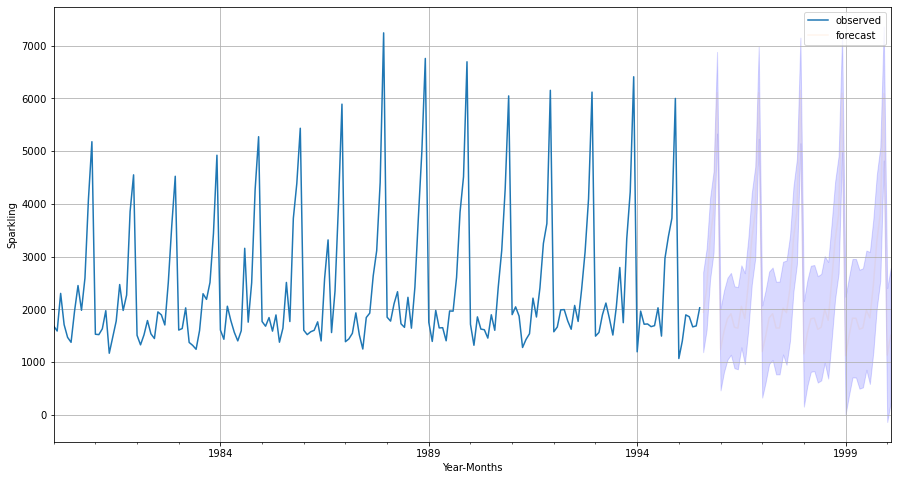

In [171]:
axis=df["Sparkling"].plot(label="observed")
pred_full_manual_SARIMA_date["mean"].plot(ax=axis, label="forecast",alpha=0.07)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date["mean_ci_lower"],
                 pred_full_manual_SARIMA_date["mean_ci_upper"], color="blue", alpha=.15)
axis.set_xlabel("Year-Months")
axis.set_ylabel("Sparkling")
plt.legend(loc="best")
plt.grid()

Text(0.5, 1.0, 'Sparkling: 12 Months forecast')

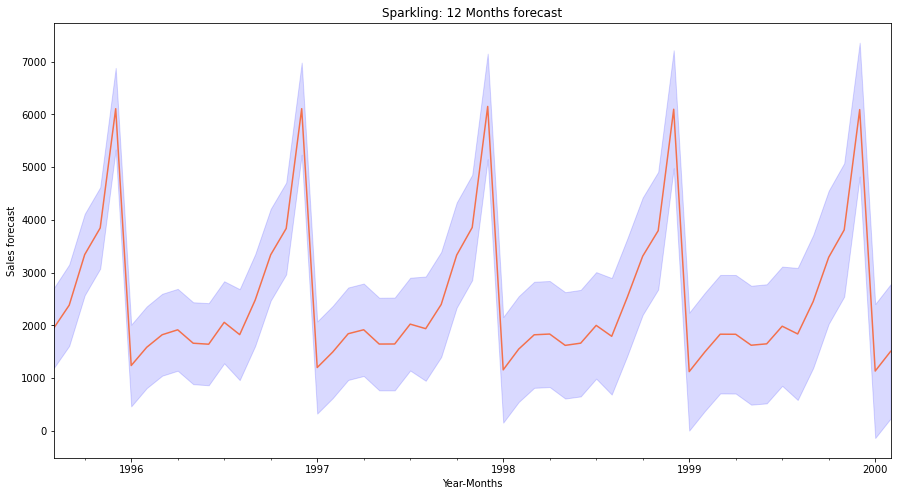

In [172]:
axis=pred_full_manual_SARIMA_date["mean"].plot(alpha=0.7, color="orangered")
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date["mean_ci_lower"],
                 pred_full_manual_SARIMA_date["mean_ci_upper"], color="blue", alpha=.15)
axis.set_xlabel("Year-Months")
axis.set_ylabel("Sales forecast")
plt.title("Sparkling: 12 Months forecast", fontsize=12)

In [173]:
forecast=pd.DataFrame({"Sparkling":np.round(pred_full_manual_SARIMA_date["mean"], 2)})

In [174]:
forecast

,Sparkling
1995-08-01,1947.60
1995-09-01,2383.87
1995-10-01,3342.80
1995-11-01,3847.54
1995-12-01,6107.85
1996-01-01,1239.96
1996-02-01,1585.82
1996-03-01,1824.05
1996-04-01,1917.37
1996-05-01,1663.10


In [175]:
np.sum(forecast["Sparkling"])

137483.96

In [176]:
forecast.describe()

,Sparkling
count,55.000000
mean,2499.708364
std,1382.211981
min,1124.810000
25%,1647.960000
50%,1917.370000
75%,3302.385000
max,6151.010000


In [177]:
result_2

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979592,47.099960
"ARIMA(3,1,3)",1228.356398,39.468531
"SARIMA(3,1,3)(3,2,0,23)",331.466756,11.852175
"SARIMA(3,1,3)(3,1,2,12)",324.104520,11.046017


In [184]:
resultsDf=pd.concat([result_2, resultsDf])
resultsDf

,RMSE,MAPE,Test RMSE
"ARIMA(2,1,2)",1299.979592,47.099960,NaN
"ARIMA(3,1,3)",1228.356398,39.468531,NaN
"SARIMA(3,1,3)(3,2,0,23)",331.466756,11.852175,NaN
"SARIMA(3,1,3)(3,1,2,12)",324.104520,11.046017,NaN
"ARIMA(2,1,2)",1299.979592,47.099960,NaN
"ARIMA(3,1,3)",1228.356398,39.468531,NaN
"SARIMA(3,1,3)(3,2,0,23)",331.466756,11.852175,NaN
"SARIMA(3,1,3)(3,1,2,12)",324.104520,11.046017,NaN
RegressionOnTime,NaN,NaN,1389.135175
NaiveModel,NaN,NaN,3864.279352
